In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
from sklearn import preprocessing
sns.set(rc={'figure.figsize':(18, 3)})

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.set_option('display.float_format', lambda x: x)
# pd.reset_option('^display.', silent=True)

## Using cleaned datasets

In [3]:
raw = pd.read_csv('datasets_cleaned/crops_cleaned.csv')
prices = pd.read_csv('datasets_cleaned/producer_prices_cleaned.csv')
caffeinePrices = pd.read_csv('datasets_cleaned/caffeine_prices_clean.csv')
rainfall = pd.read_csv('datasets_cleaned/rainfall_clean.csv')
temperatures = pd.read_csv('datasets_cleaned/temperatures_clean.csv')

In [4]:
caffeinePrices

Area           Item  Year       Price      continent
0        Angola  Coffee, green  2010   511.40000         Africa
1        Angola  Coffee, green  2011   702.60000         Africa
2     Argentina            Tea  1991    49.80000  South America
3     Argentina            Tea  1992    50.50000  South America
4     Argentina            Tea  1993    63.10000  South America
...         ...            ...   ...         ...            ...
1903      Yemen  Coffee, green  2013  7957.90000           Asia
1904      Yemen  Coffee, green  2015  8520.50000           Asia
1905      Yemen  Coffee, green  2016  9116.20000           Asia
1906      Yemen  Coffee, green  2017  9571.90000           Asia
1907      Yemen  Coffee, green  2018 10050.50000           Asia

[1908 rows x 5 columns]

### Normalization

In [4]:
prices_melted = pd.melt(prices, id_vars=['Item'], value_vars=prices.columns[9:], value_name='Price')
prices_melted

Item variable     Price
0                        Apples     1998 248.90000
1                      Apricots     1998   0.00000
2                        Barley     1998 325.30000
3                    Beans, dry     1998 956.00000
4                  Beans, green     1998   0.00000
...                         ...      ...       ...
195465           Sweet potatoes     2019   0.00000
195466  Tobacco, unmanufactured     2019   0.00000
195467                 Tomatoes     2019   0.00000
195468    Vegetables, fresh nes     2019   0.00000
195469                    Wheat     2019   0.00000

[195470 rows x 3 columns]

In [5]:
def normalize(df, columns):
    minmaxscaler = preprocessing.MinMaxScaler()
    x = df[columns].values
    x_scaled = minmaxscaler.fit_transform(x)
    df_temp = pd.DataFrame(x_scaled, columns=columns, index=df.index)
    df[columns] = df_temp
#     return (df, minmaxscaler.copy())
    return (df, minmaxscaler)

In [6]:
rawMeltedYield = raw.copy()[raw['Element'] == 'Yield'].melt(id_vars=['Area'], value_vars=raw.columns[3:],
                              var_name='Year', value_name='Yield')
rawMeltedYield = rawMeltedYield.groupby(['Year','Area'])['Yield'].mean().reset_index()
rawMeltedYield['Year'] = rawMeltedYield['Year'].astype(str)
rawMeltedYield['Area'] = rawMeltedYield['Area'].astype(str)
rawMeltedYield['Area'] = rawMeltedYield['Area'].str.strip()
rawMeltedYield

Year            Area       Yield
0      1961     Afghanistan 40287.91667
1      1961          Africa 45553.50993
2      1961         Albania 15242.56944
3      1961         Algeria 31470.05556
4      1961  American Samoa 19846.12000
...     ...             ...         ...
14843  2018           World 93636.97674
14844  2018           Yemen 60869.95455
14845  2018    Yugoslav SFR     0.00000
14846  2018          Zambia 82033.07692
14847  2018        Zimbabwe 63697.85714

[14848 rows x 3 columns]

In [7]:
rawMeltedProduction = raw.copy()[raw['Element'] == 'Production'].melt(id_vars=['Area'], value_vars=raw.columns[3:], var_name='Year', value_name='Production')
rawMeltedProduction = rawMeltedProduction.groupby(['Year','Area'])['Production'].sum().reset_index()
rawMeltedProduction['Year'] = rawMeltedProduction['Year'].astype(str)
rawMeltedProduction['Area'] = rawMeltedProduction['Area'].astype(str)
rawMeltedProduction['Area'] = rawMeltedProduction['Area'].str.strip()
rawMeltedProduction

Year            Area        Production
0      1961     Afghanistan    10113549.00000
1      1961          Africa   391312625.00000
2      1961         Albania     1457890.00000
3      1961         Algeria     8995374.00000
4      1961  American Samoa       25852.00000
...     ...             ...               ...
15017  2018           World 19413566384.00000
15018  2018           Yemen     4986815.00000
15019  2018    Yugoslav SFR           0.00000
15020  2018          Zambia    19756945.00000
15021  2018        Zimbabwe    11109106.00000

[15022 rows x 3 columns]

In [8]:
areaHarvestedMelted = raw.copy()[raw['Element'] == 'Area harvested']
areaHarvestedMelted = areaHarvestedMelted.melt(id_vars=['Area'], value_vars=raw.columns[3:],
                              var_name='Year', value_name='Area Harvested').groupby(['Year','Area'])['Area Harvested'].sum().reset_index()
areaHarvestedMelted

Year            Area   Area Harvested
0      1961     Afghanistan    7959162.00000
1      1961          Africa  238329548.00000
2      1961         Albania     998260.00000
3      1961         Algeria    6841230.00000
4      1961  American Samoa      18425.00000
...     ...             ...              ...
14901  2018           World 3456659059.00000
14902  2018           Yemen    1878576.00000
14903  2018    Yugoslav SFR          0.00000
14904  2018          Zambia    6094188.00000
14905  2018        Zimbabwe    5211242.00000

[14906 rows x 3 columns]

In [9]:
# pricesNormalized = prices_melted.copy()
# pricesNormalized, pricesScaler = normalize(pricesNormalized, ['Price'])

In [10]:
# caffeinePricesNormalized = caffeinePrices.copy()
# caffeinePricesNormalized, caffeinePricesScaler = normalize(caffeinePricesNormalized, ['Price'])

In [11]:
rainfall = pd.pivot_table(rainfall, values='Rainfall - (MM)', index=['Year', 'Country'], aggfunc=np.sum)
temperatures = pd.pivot_table(temperatures, values='Temperature - (Celsius)', index=['Year', 'Country'], aggfunc=np.mean)

rainfallAndTemperatures = rainfall.merge(temperatures, on=['Year','Country']).reset_index()
rainfallAndTemperatures.rename(columns={"Country": "Area"},inplace=True)

rainfallAndTemperatures

Year                                Area  Rainfall - (MM)  \
0     1991                         Afghanistan        435.44990   
1     1991                             Albania        917.86880   
2     1991                             Algeria         88.13276   
3     1991                             Andorra        757.11630   
4     1991                              Angola       1017.98660   
...    ...                                 ...              ...   
5065  2016  Venezuela (Bolivarian Republic of)       1844.70330   
5066  2016                            Viet Nam       1988.86180   
5067  2016                               Yemen        171.48137   
5068  2016                              Zambia        803.47810   
5069  2016                            Zimbabwe        455.13295   

      Temperature - (Celsius)  
0                    12.89449  
1                    11.03765  
2                    22.51346  
3                    11.18815  
4                    21.71688  
...                       ...  
5065                 26.47820  
5066                 25.07316  
5067                 24.22120  
5068                 22.73705  
5069                 22.31017  

[5070 rows x 4 columns]

In [12]:
rainfallAndTemperatures['Area'] = rainfallAndTemperatures['Area'].str.strip()
rainfallAndTemperatures['Year'] = rainfallAndTemperatures['Year'].astype(str)
rainfallAndTemperatures['Area'] = rainfallAndTemperatures['Area'].astype(str)

In [13]:
# rainAndTempNormalized = rainfall.merge(temperatures, on=['Year','Country'])
# rainAndTempNormalized.reset_index(inplace=True)
# rainAndTempNormalized.rename(columns={"Country": "Area"},inplace=True)
# rainAndTempNormalized['Area'] = rainAndTempNormalized['Area'].str.strip()

# rainAndTempNormalized, rainAndTempScaler = normalize(rainAndTempNormalized, ['Rainfall - (MM)', 'Temperature - (Celsius)'])

In [14]:
# rainAndTempNormalized['Year'] = rainAndTempNormalized['Year'].astype(str)
# rainAndTempNormalized['Area'] = rainAndTempNormalized['Area'].astype(str)

In [15]:
# world data code is 5000
# country codes are < 5000
# continent codes are > 5000 and divisible by 100
# regions(subcontinental) codes are > 5000 and <= 5504 and not divisible by 100
# regions (other) codes are > 5504

continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
subcon_regions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
        'Northern America', 'Central America', 'Caribbean', 'South America', 
        'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-eastern Asia', 'Western Asia',
        'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 
        'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regions = ['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regionalDict = {}
for region in regions:
    regionalDict[region] = raw[raw['Area']==region]

## Exploratory Data Analysis

<AxesSubplot:>

<Figure size 720x1440 with 0 Axes>

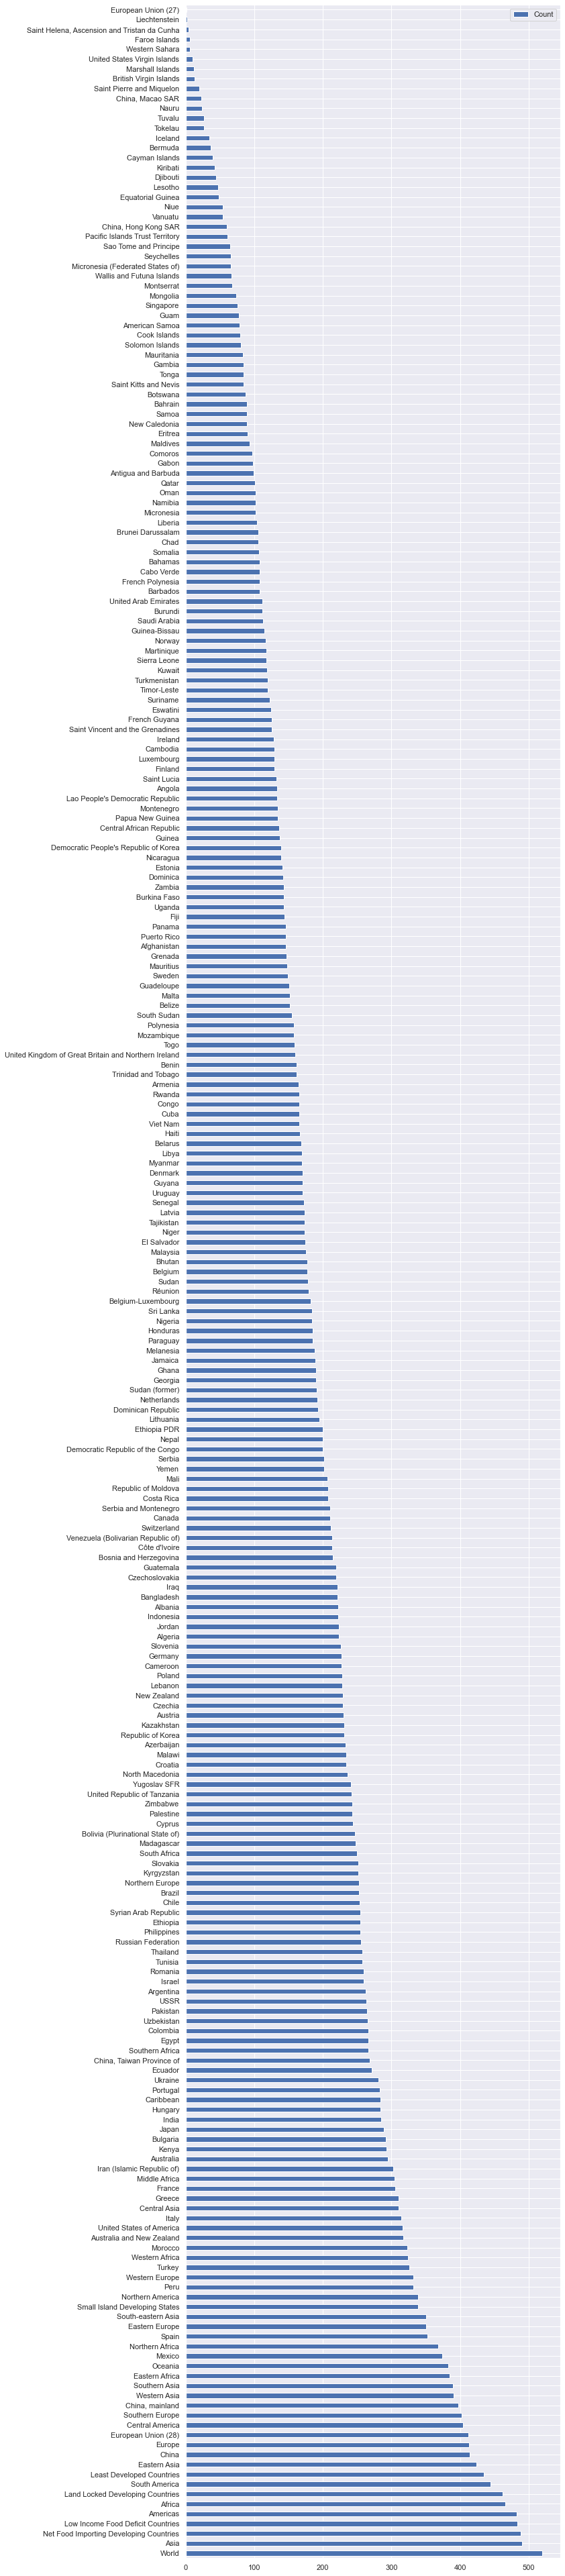

In [16]:
plt.figure(figsize=(10,20))
# sns.boxplot(raw['Area'].value_counts())

locationCounts = pd.DataFrame(raw['Area'].value_counts())
locationCounts.columns = ['Count']
locationCounts.reset_index()
locationCounts.plot.barh(figsize=(10,70))
# sns.boxplot(x=locationCounts.index, y='Count', width=0.15, data=locationCounts)    

index                      Area           Item  Year       Price  \
1457   5557        Russian Federation            Tea  2017 72627.40000   
1458   5558        Russian Federation            Tea  2018 67614.80000   
1459   5559        Russian Federation            Tea  2019 64362.30000   
1773   6764  United States of America  Coffee, green  2019 44313.00000   
1772   6762  United States of America  Coffee, green  2018 42770.00000   
...     ...                       ...            ...   ...         ...   
524    2034                   Ecuador  Coffee, green  1996    24.70000   
520    2029                   Ecuador  Coffee, green  1994    14.20000   
518    2027                   Ecuador  Coffee, green  1993     8.60000   
516    2025                   Ecuador  Coffee, green  1992     5.20000   
514    2023                   Ecuador  Coffee, green  1991     4.80000   

     continent  
1457    Europe  
1458    Europe  
1459    Europe  
1773  Americas  
1772  Americas  
...        ...  
524   Americas  
520   Americas  
518   Americas  
516   Americas  
514   Americas  

[1908 rows x 6 columns]

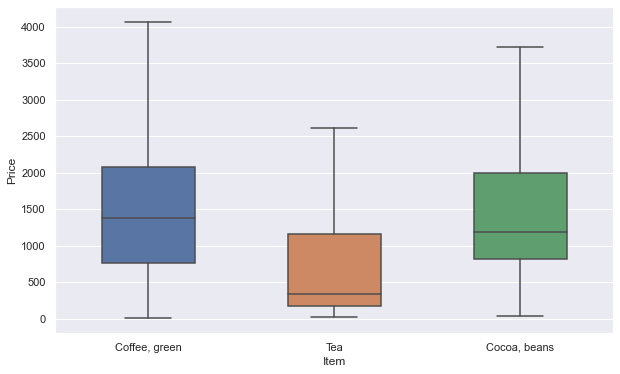

In [17]:
#distribution of prices
plt.figure(figsize=(10,6))
sns.boxplot(y='Price', x='Item',width=0.5, data=caffeinePrices, showfliers=False)
caffeinePrices.sort_values(by='Price', ascending=False)

In [18]:
# # view of all areas..
# pd.set_option('display.max_rows', 260)
# areas.sort_index()

In [19]:
world = regionalDict['World']
worldProductionTotal = world[world['Element'] == 'Production'].loc[:, '1961':]
worldYieldTotal = world[world['Element'] == 'Yield'].loc[:, '1961':]
worldAreaHarvested = world[world['Element'] == 'Area harvested'].loc[:, '1961':]

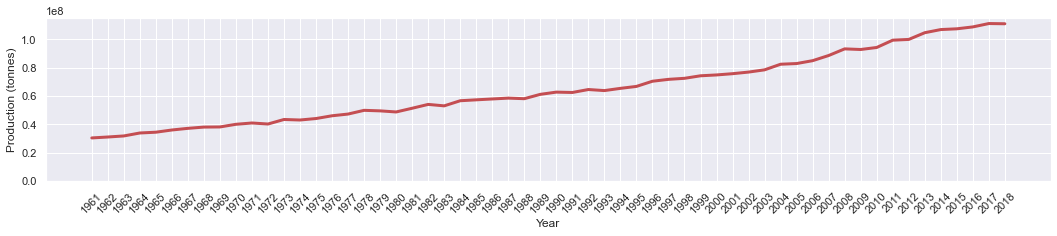

In [20]:
plt.xticks(rotation=45)
plt.plot(worldProductionTotal.mean(), label='Production', color='r', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.ylim(0)
plt.show()

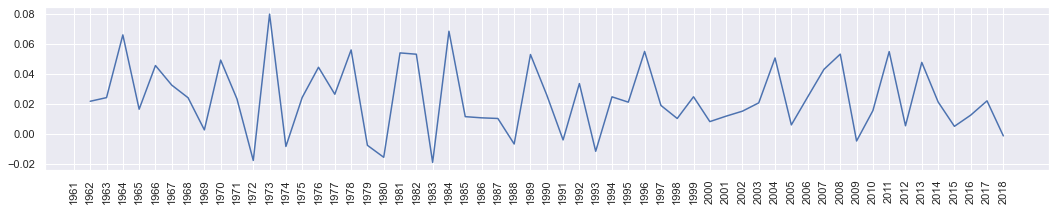

In [21]:
change = worldProductionTotal.mean().pct_change()
change.plot()
plt.xticks(range(len(change.index)), change.index, rotation=90)
plt.show()

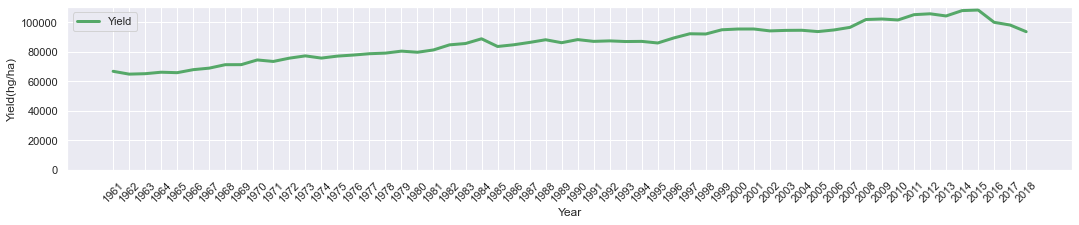

In [22]:
plt.xticks(rotation=45)
plt.plot(worldYieldTotal.mean(), label='Yield', color='g', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Yield(hg/ha)')
plt.legend()
plt.ylim(0)
plt.show()

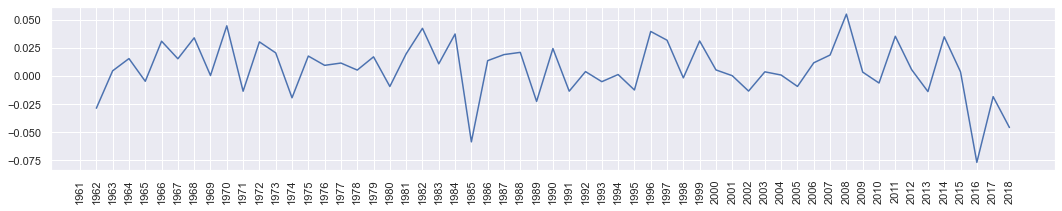

In [23]:
changeYield = worldYieldTotal.mean().pct_change()
changeYield.plot()
plt.xticks(range(len(changeYield.index)), changeYield.index, rotation=90)
plt.show()

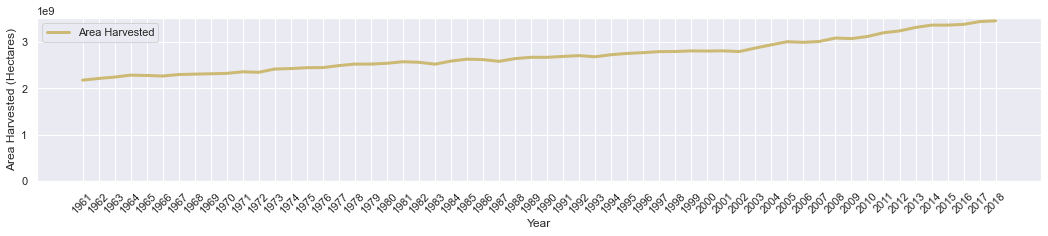

In [24]:
plt.xticks(rotation=45)
plt.plot(worldAreaHarvested.sum(), label='Area Harvested', color='y', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Area Harvested (Hectares)')
plt.legend()
plt.ylim(0)
plt.show()

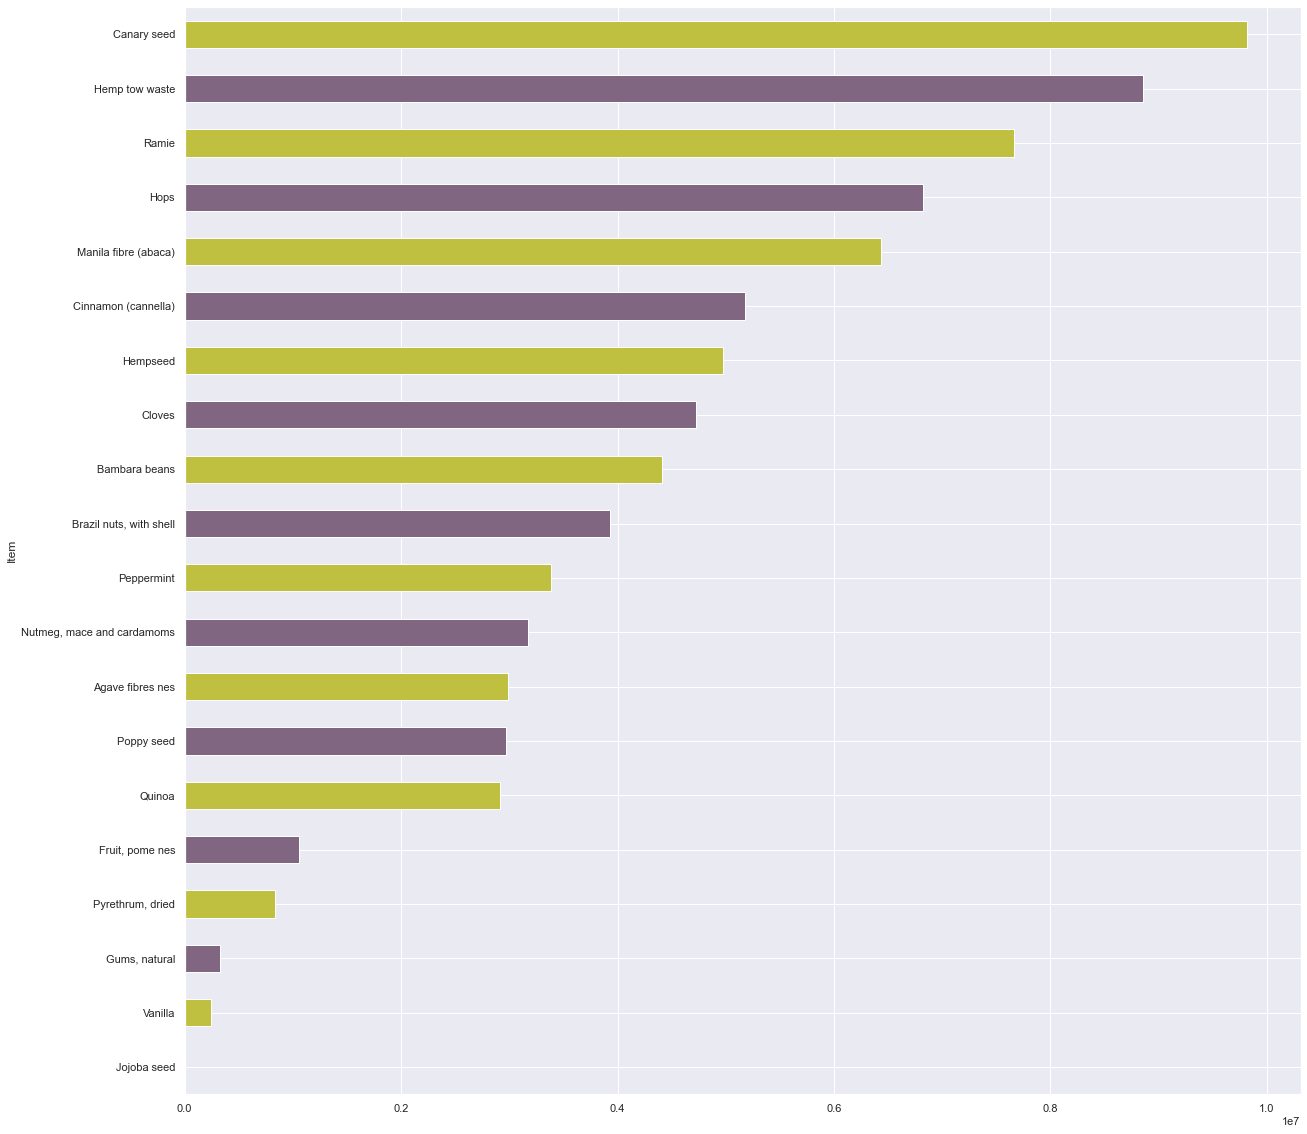

In [25]:
worldProduction = world[world['Element'] == 'Production']
worldProductionByItem = worldProduction.groupby('Item').sum().loc[:, '1961':]
# worldProductionByItem.iloc[0].plot()
plt.figure(figsize=(20,20))

my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5

ax = worldProductionByItem.sum(axis=1).sort_values().iloc[0:20].round(3).plot.barh(color=my_colors)

# for i in range(1, len(worldProductionByItem)):
#     ax = worldProductionByItem.iloc[i].plot(figsize=(20, 10), label=worldProductionByItem.index[i], kind='bar')
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Production(tonnes)')
# print('The best performing on average seems to be: ' + worldProductionByItem.mean(axis=1).idxmax())
# plt.grid(True)

## What is the correlation between climate change (surface temperatures in this case) and crop production in countries that rank in the top 3 in Climate Risk Indexes? 

These are the countries with notably high climate risk indexes and we will be observing the ones at the top.
###   
<div>
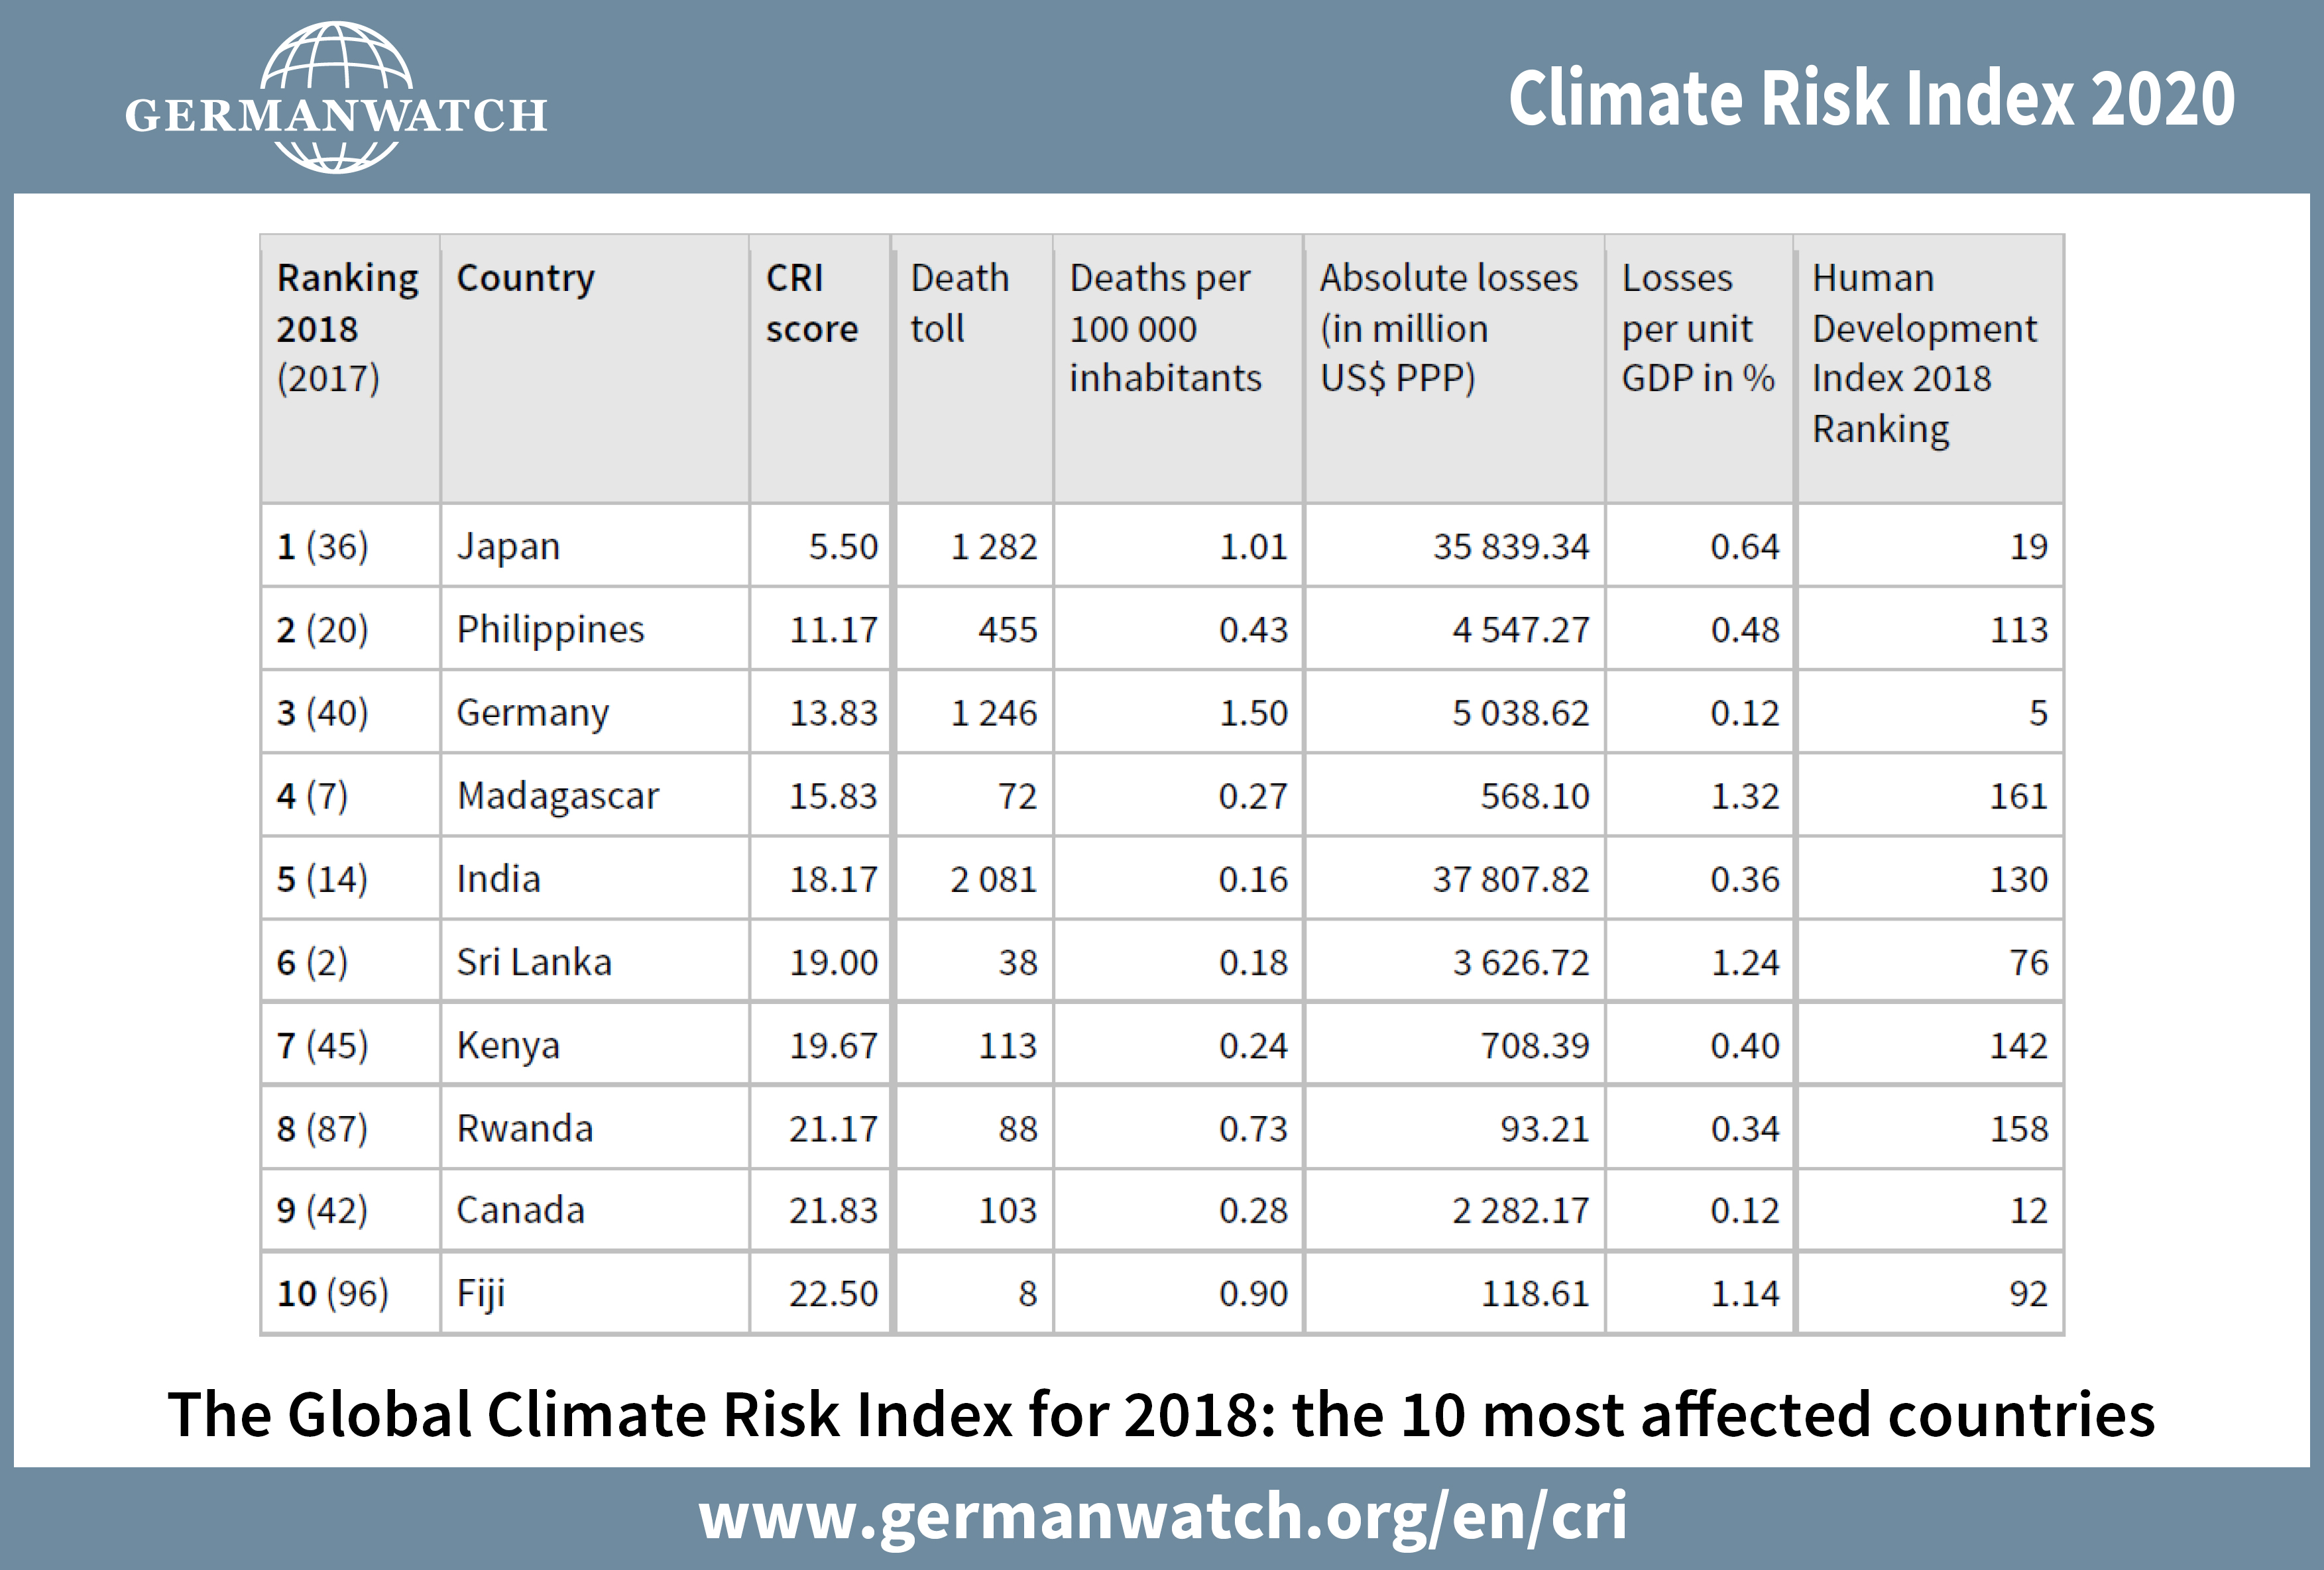
</div>

### In countries with a High Climate Risk Index, what is the correlation and does correlation actually imply causation?

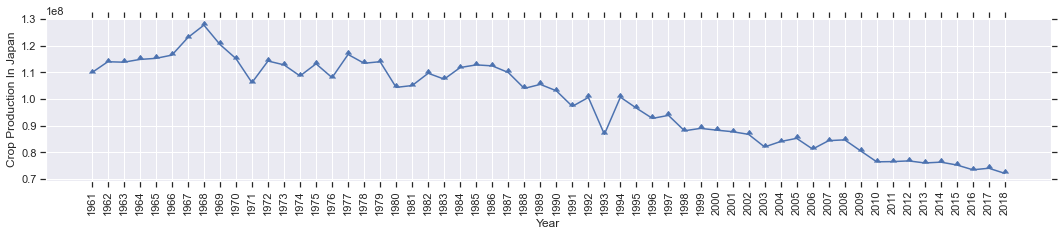

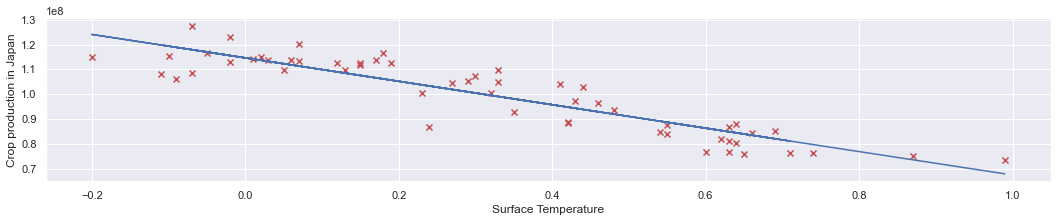

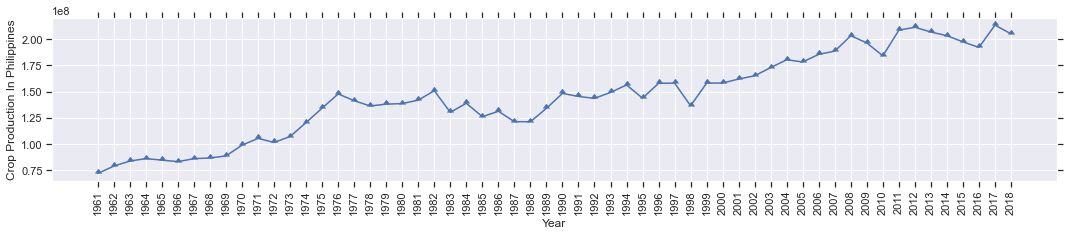

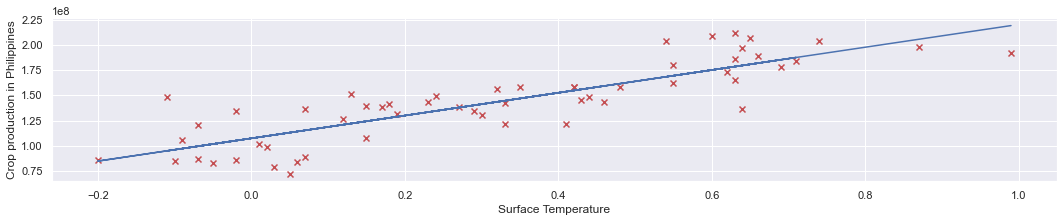

In [26]:
climate = pd.read_csv('datasets_raw/climate/annual_csv.csv')
surfaceTemp = pd.DataFrame(climate[np.logical_and(climate['Source']=='GISTEMP', climate['Year']>=1961)].sort_values(by=['Year']))
surfaceTemp.rename({"Mean": "SurfaceTemp"}, inplace=True)
surfaceTemp['Year'] = pd.to_numeric(surfaceTemp['Year'])
surfaceTemp.drop(['Source'], axis=1, inplace=True)
surfaceTemp.set_index('Year', inplace=True)

HighCRICountries = ['Japan', 'Philippines']

for country in HighCRICountries:
    AreaAggregated = raw[raw['Area']==country]
    AreaProductionYearly = AreaAggregated[AreaAggregated['Element']=='Production'].loc[:,'1961':].sum()
    plt.plot(AreaProductionYearly, marker=10)
    plt.xlabel('Year')
    plt.ylabel('Crop Production In ' + country)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', 
    labelbottom='on')
    plt.xticks(rotation=90)
    plt.show()

    areaFormatted = pd.DataFrame()
    count = 0
    for year, value in AreaProductionYearly.iteritems():
        areaFormatted.loc[count, 'Year'] = year
        areaFormatted.loc[count, 'Total'] = value
        count += 1
    areaFormatted['Year'] = pd.to_numeric(areaFormatted['Year'])

    areaMerged = areaFormatted.merge(surfaceTemp, on='Year')
    areaMerged.set_index('Year', inplace=True)

    plt.scatter(areaMerged['Mean'], areaMerged['Total'], marker='x', cmap='viridis_r', color='r')
    plt.xlabel('Surface Temperature')
    plt.ylabel('Crop production in ' + country)

    x = np.array(areaMerged['Mean'])
    y = np.array(areaMerged['Total'])
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.show()

For Japan, the overall correlation is negative. But for other countries who have faced the impact of climate change, there is a weak to moderate positive correlation. Because of this, we can perhaps say, that the impact is not too apparent or there are other factors that need to be taken into account (industrial development, nature of crops grown, etc.), geographical position on the map and more.

# Studying Caffeine

1. What are the biggest sources of caffeine?

<AxesSubplot:>

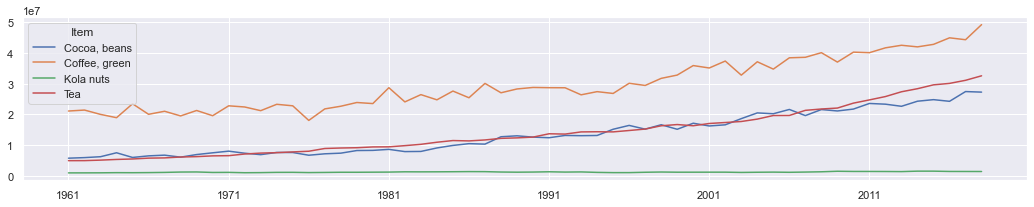

In [27]:

caffeineProduction = raw[raw['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineProduction = caffeineProduction[caffeineProduction['Element'] == 'Production']
caffeineProduction.groupby('Item').sum().loc[:,'1961':].T.plot()

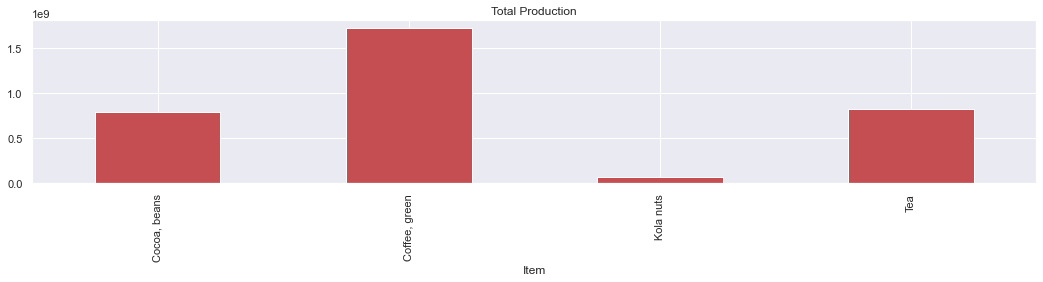

In [28]:
# Total production over the years
caffeineProduction.groupby('Item').sum().loc[:,'1961':].sum(axis=1).plot.bar(color='r')
plt.title('Total Production')
plt.show()

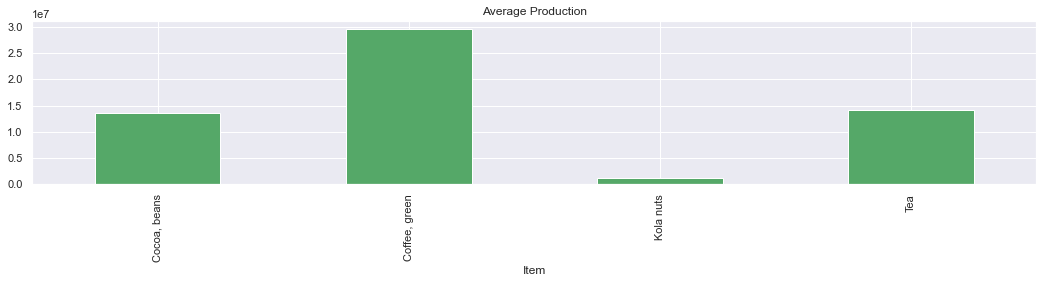

In [29]:
caffeineProduction.groupby('Item').sum().loc[:,'1961':].mean(axis=1).plot.bar(color='g')
plt.title('Average Production')
plt.show()

2. How has caffeine crop production changed over the decades, measured across Asia Pacific/Africa/Latin America and if a trend is observed for one, does that same trend apply for the others?

### Comparing sub-regionally

<AxesSubplot:ylabel='Area'>

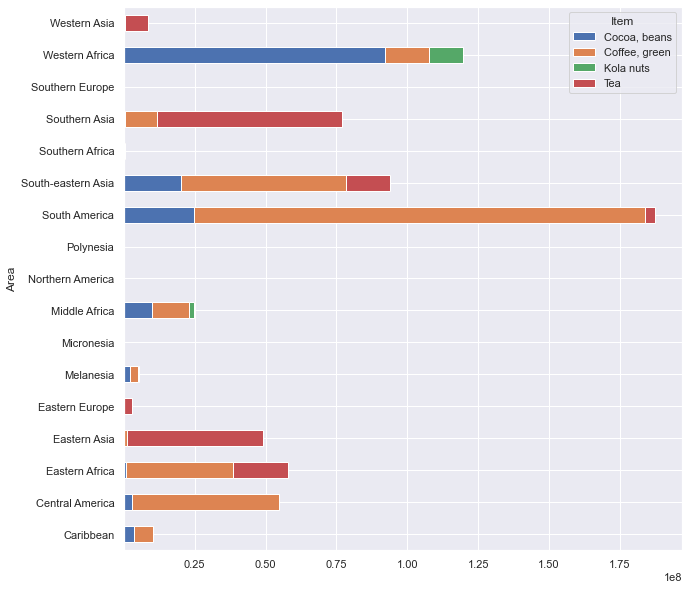

In [30]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(subcon_regions)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']

# regionsProduction.groupby('Area').sum().mean(axis=1).plot.bar()
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

South America appears to be the biggest producer of caffeine-based crops in the world and it's biggest produce is green coffee beans, astronomically higher than any other region in the world.

### Comparing continentally

<AxesSubplot:ylabel='Area'>

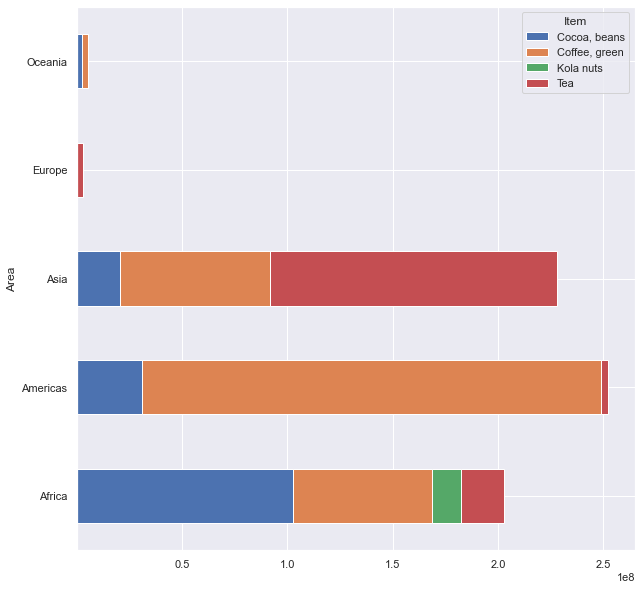

In [31]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(continents)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

Similarly, North and South America cumulatively produce the most caffeine-based crops while Asia comes close. North and South America are the biggest producers of green coffee beans, while Asia produces the most tea leaves and Africa produces the most cocoa beans. The three regions actively grow a different combination of crops and contribute differently to the global market.

## Asia, Africa, Americas (World's Biggest Manufacturers)

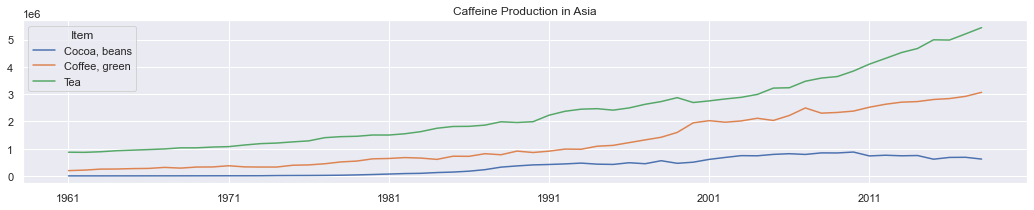

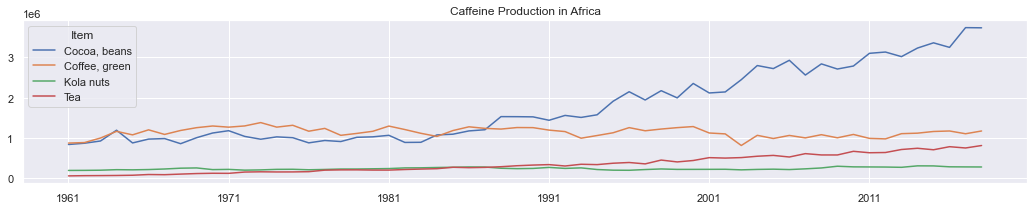

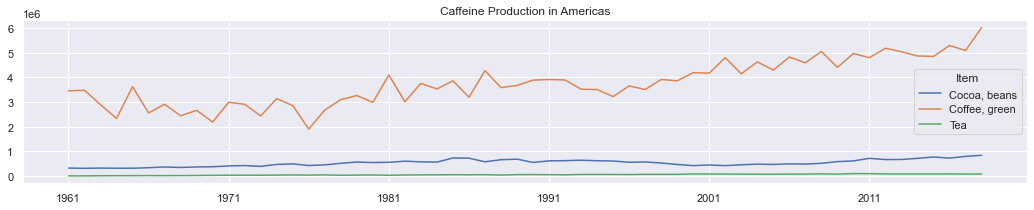

In [32]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contProduction.T.plot(title=f'Caffeine Production in {continent}')

### Understanding the trends
The takeaways from the depictions:

1) Global Production of Caffeine based crops is on an overall upward trend, even if there are mild fluctuations over the years. This can be attributed to either an increasing population, increasing demand, further cultivation of these crops, higher export rates, etc.

2) The 3 biggest sources of caffeine are cocoa beans, green coffee beans and tea leaves and each of the regions are leaders in each of these. Asia sort of ```specialises```in tea leaves, Africa in cocoa and the Americas in green coffee beans.

3) In proportion, coffee beans production in the Americas is not very stable, with sudden spikes and extreme fluctuations, the pattern being much more noticeable than the other 2 continents.

4) Asia's growth, at first sight, is the smoothest.

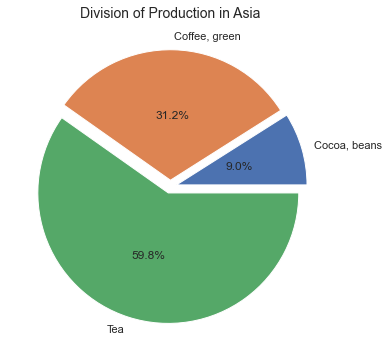

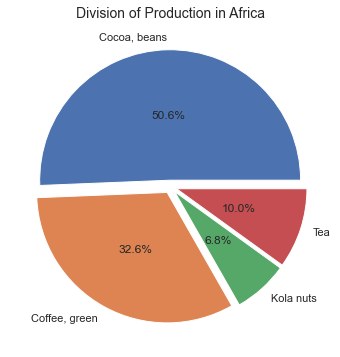

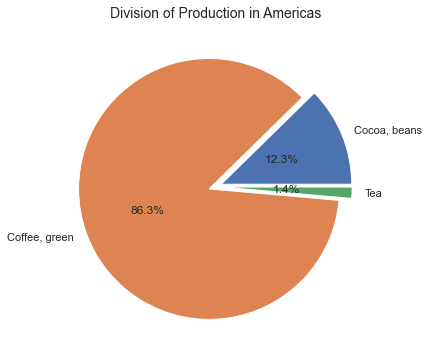

In [33]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contTotals = contProduction.sum(axis=1)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = contTotals.keys()
    plt.pie(x=contTotals, autopct="%.1f%%", explode=[0.05]*len(labels), labels=labels, pctdistance=0.5)
    plt.title(f"Division of Production in {continent}", fontsize=14);

While pie charts aren't a good indication of volume, it does say something about how the market share is split and it reaffirms the points made above.

----------------------------------------------------------------------------------------------------------------------

3. How has the price of caffeine crops changed over the years in these chosen economies and is that attributed to any particular factor (a sudden introduction of an alternative, etc.)? Is there an effect of production levels on the prices of caffeine-based crops (helps to weigh their value)? When production increases or decreases, what generally happens?

Item  Cocoa, beans  Coffee, green        Tea
Year                                        
1991     850.00000     1090.90000 2666.81667
1992     929.70000     1044.68000 3187.30000
1993     735.55000     1000.14000 3787.33333
1994    1005.40000     1299.48000 2774.72857
1995     933.13333     1933.38571 5039.35000
1996     963.25000     1767.45000 5113.06667
1997     867.13333     1600.86667 3290.90000
1998     770.73333     1515.80000 2385.66250
1999     692.40000     1158.28333 4139.08571
2000     520.75000      858.52857 3476.28750
2001     529.45000      786.35556 2303.67000
2002     861.35000      709.76250 2254.52500
2003    1047.65000      992.52857 2722.82857
2004     989.50000     1088.58571 3137.02857
2005     982.70000     1204.72857 2727.75000
2006    1059.45000     1320.44286 2215.44444
2007    1194.65000     1805.85714 1976.21111
2008    1402.05000     1847.10000 2145.08000
2009    1748.66667     2556.73333 2197.30000
2010    1957.76667     2891.50000 3164.75000
2011    21

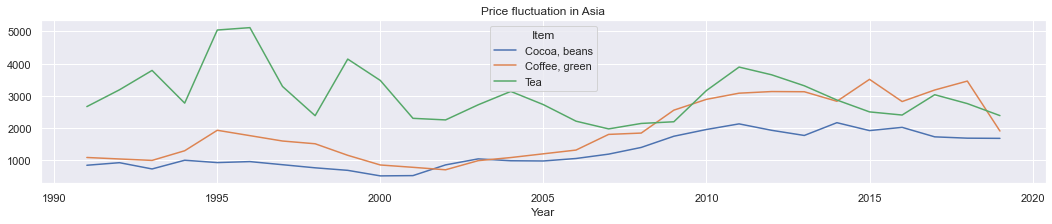

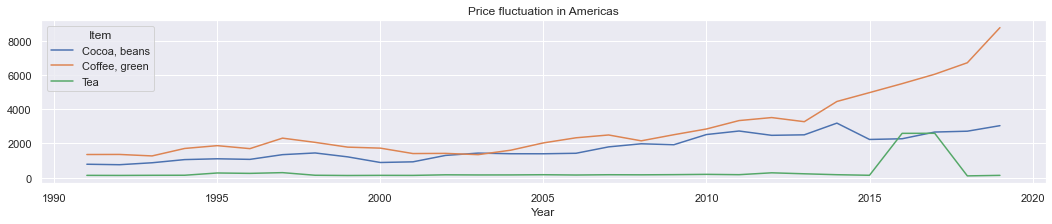

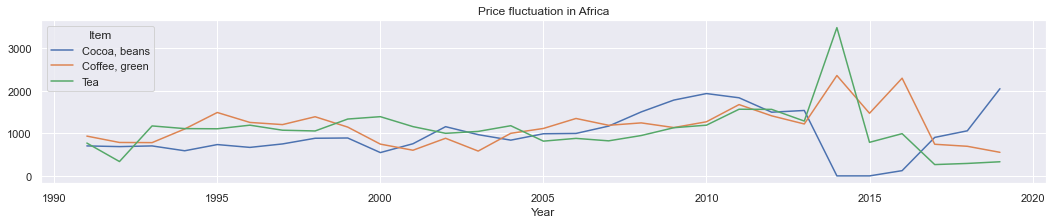

In [44]:
biggestManufacturers = ['Asia', 'Americas', 'Africa']
caffeinePrices.fillna(0, inplace=True)
for continent in biggestManufacturers:
    caffeinePriceRange = caffeinePrices[caffeinePrices['continent'] == continent].set_index('Year')
#     print(caffeinePriceRange)
    continentGrouped = caffeinePriceRange.groupby(['Year','Item'])['Price'].mean().unstack()
    continentGrouped.fillna(0, inplace=True)
    print(continentGrouped)
    print()
    continentGrouped.plot(title=f'Price fluctuation in {continent}')

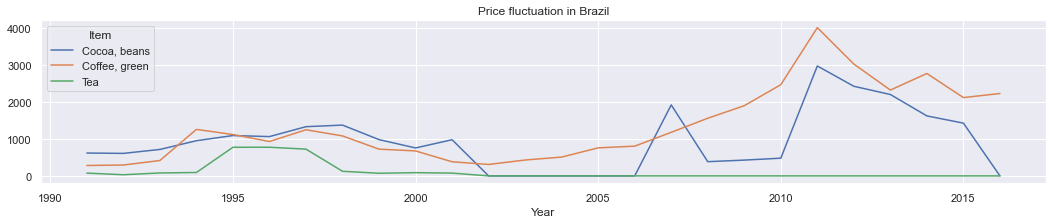

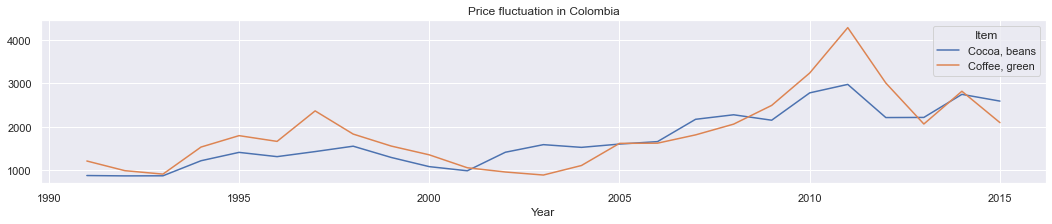

In [45]:
countries = ['Brazil', 'Colombia']
# print(caffeinePrices['Area'].value_counts())
for country in countries:
    caffeinePriceRange = caffeinePrices[caffeinePrices['Area'] == country].set_index('Year')
    countryGrouped = caffeinePriceRange.groupby(['Year','Item'])['Price'].mean().unstack()
    countryGrouped.fillna(0, inplace=True)
    countryGrouped.plot(title=f'Price fluctuation in {country}')

In [46]:
caffeineSorted = caffeineProduction.groupby(['Item']).mean().T.reset_index()
priceMerge = caffeinePrices.drop(['Area'], axis=1)

caffeineSorted.columns = ['Year', 'Cocoa, beans', 'Coffee, green', 'Kola nuts', 'Tea']
caffeineSorted['Year']
caffeineSorted = pd.melt(caffeineSorted, id_vars=['Year'], value_vars=caffeineSorted.columns[1:], var_name='Item', value_name='Production')
caffeineSorted.Year = caffeineSorted.Year.astype(str)
priceMerge.Year = priceMerge.Year.astype(str)
merged = caffeineSorted.merge(priceMerge, on=['Year', 'Item'])

merged.set_index('Year')
# sns.regplot(x='Production', y='Value',data=merged)

Item   Production  index       Price continent
Year                                                        
1991  Cocoa, beans 141940.19540    453   823.60000  Americas
1991  Cocoa, beans 141940.19540    633   619.70000  Americas
1991  Cocoa, beans 141940.19540    920   709.00000    Africa
1991  Cocoa, beans 141940.19540   1228   870.10000  Americas
1991  Cocoa, beans 141940.19540   1333   311.90000    Africa
...            ...          ...    ...         ...       ...
2018           Tea 423099.68831   5558 67614.80000    Europe
2018           Tea 423099.68831   5936   195.60000    Africa
2018           Tea 423099.68831   6108   554.00000      Asia
2018           Tea 423099.68831   6627   480.50000      Asia
2018           Tea 423099.68831   7031   377.20000      Asia

[1871 rows x 5 columns]

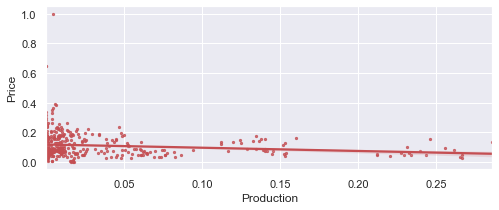

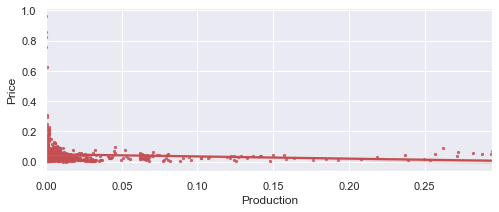

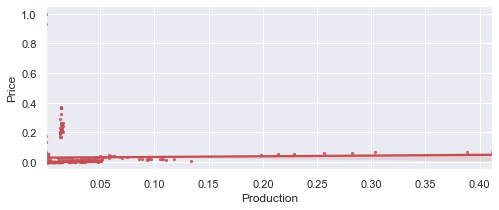

In [47]:
#Looking at coffee, green beans
def prodPriceCorr(item):
    greencoffeeprices = caffeinePrices.copy()[caffeinePrices['Item'] == item]
    greencoffeeproduction = caffeineProduction[caffeineProduction['Item'] == item]
    greencoffeeproduction = greencoffeeproduction.melt(id_vars=['Area'], value_vars=greencoffeeproduction.columns[3:],
                              var_name='Year', value_name='Production')
#     greencoffeeprices.drop(columns=['Item', 'Item Code', 'continent'], inplace=True)
    greencoffeeprices['Year'] = greencoffeeprices['Year'].astype(str)
    greencoffeeproduction['Year'] = greencoffeeproduction['Year'].astype(str)
    
    greencoffeeproduction[['Production']] = greencoffeeproduction[['Production']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
    greencoffeeprices[['Price']] = greencoffeeprices[['Price']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

    merged = greencoffeeproduction.merge(greencoffeeprices, on=['Area', 'Year'])
    merged.sort_values(by='Production')

    plt.figure(figsize=(8,3))
    sns.regplot(x='Production', y='Price', data=merged, color='r',scatter_kws={"s": 5})
    
caffeineItems = ['Cocoa, beans', 'Coffee, green', 'Tea']
for item in caffeineItems:
    prodPriceCorr(item)

4. In 1971 and other key dates in the growth of Starbucks, an international coffee beverage company. Were there any noticeable trends in global or regional coffee production near this time period?

In [48]:
caffeineYield = raw[raw['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineYield = caffeineYield[caffeineYield['Element'] == 'Yield']

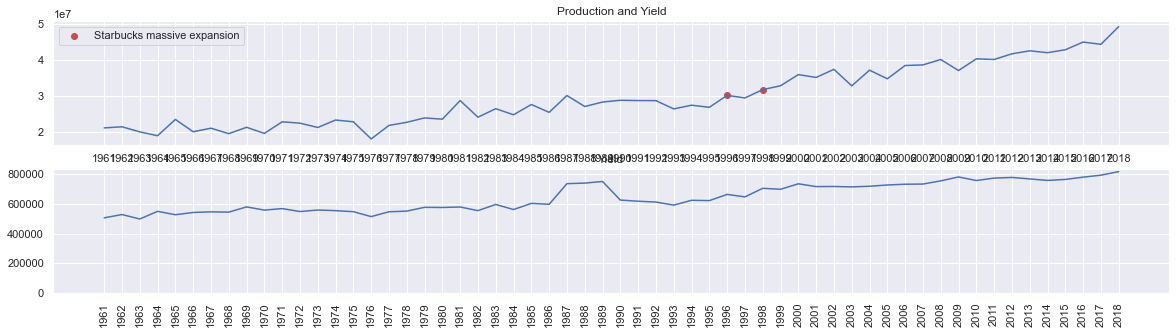

In [49]:
totalProd = caffeineProduction[caffeineProduction['Item'].str.contains('Coffee')].groupby('Item').sum().loc[:,'1961':].sum()
totalYield = caffeineYield[caffeineYield['Item'].str.contains('Coffee')].groupby('Item').sum().loc[:,'1961':].sum()
# plot.set_ylim(ymin=0)

fig, axes = plt.subplots(2, 1, figsize=(20, 5))
plt.xticks(rotation=90)
axes[0].plot(totalProd)
axes[0].set_title('Production and Yield')
axes[1].plot(totalYield)
axes[1].set_title('Yield')
# plt.xticks(rotation=90)
plt.ylim(0)
axes[0].scatter(['1996', '1998'], [totalProd['1996'], totalProd['1998']], marker='o', color='r', label='Starbucks massive expansion')
axes[0].legend(loc='upper left')

From the starbucks website:
```    1998
    Extends the Starbucks brand into grocery channels across the U.S.
    Opens in underserved neighborhoods through joint-venture partnership with Magic Johnson.
    Launches Starbucks.com.
    Establishes the CUP Fund emergency financial assistance fund for partners.
    Opens stores in: England, Malaysia, New Zealand, Taiwan and Thailand.
    Total stores: 1,886
```
So this happened in 2003, hence the drop there. 
https://www.nytimes.com/2003/11/25/business/difficult-times-for-coffee-industry.html

In recent years, the climb has been phenomenal, which means that it is rather promising. Other economic sources also confirm this.

## Data Modeling

## Clustering

In [50]:
from sklearn.cluster import KMeans

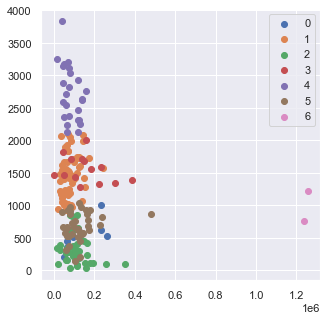

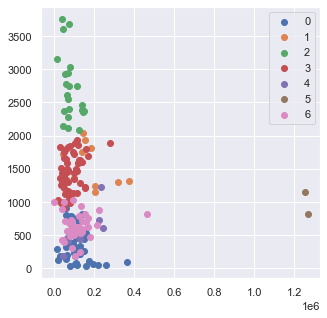

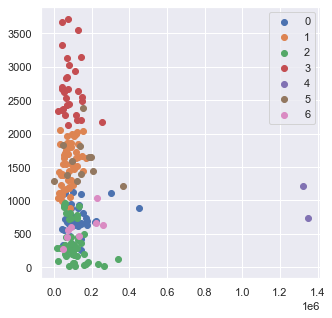

In [51]:
years = ['2014', '2015', '2016']
for year in years:
    yield2016 = rawMeltedYield[rawMeltedYield['Year'] == year]
    rainAndTem2016 = rainfallAndTemperatures[rainfallAndTemperatures['Year'] == year]
    yieldRainTemp = pd.merge(yield2016, rainAndTem2016, on=['Year', 'Area'], how='inner')
    X = yieldRainTemp[['Yield', 'Rainfall - (MM)', 'Temperature - (Celsius)']].copy()
    
    scaler = preprocessing.MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = KMeans(7, verbose=0)
    label = model.fit_predict(X_scaled)
    X.loc[:,'label'] = pd.Series(label)
    
    #Getting unique labels
 
    u_labels = np.unique(label)

    #plotting the results:

    plt.figure(figsize=(5,5))
    for i in u_labels:
        plt.scatter(X.iloc[label == i, 0] , X.iloc[label == i, 1] , label = i)
    plt.legend()
    plt.show()

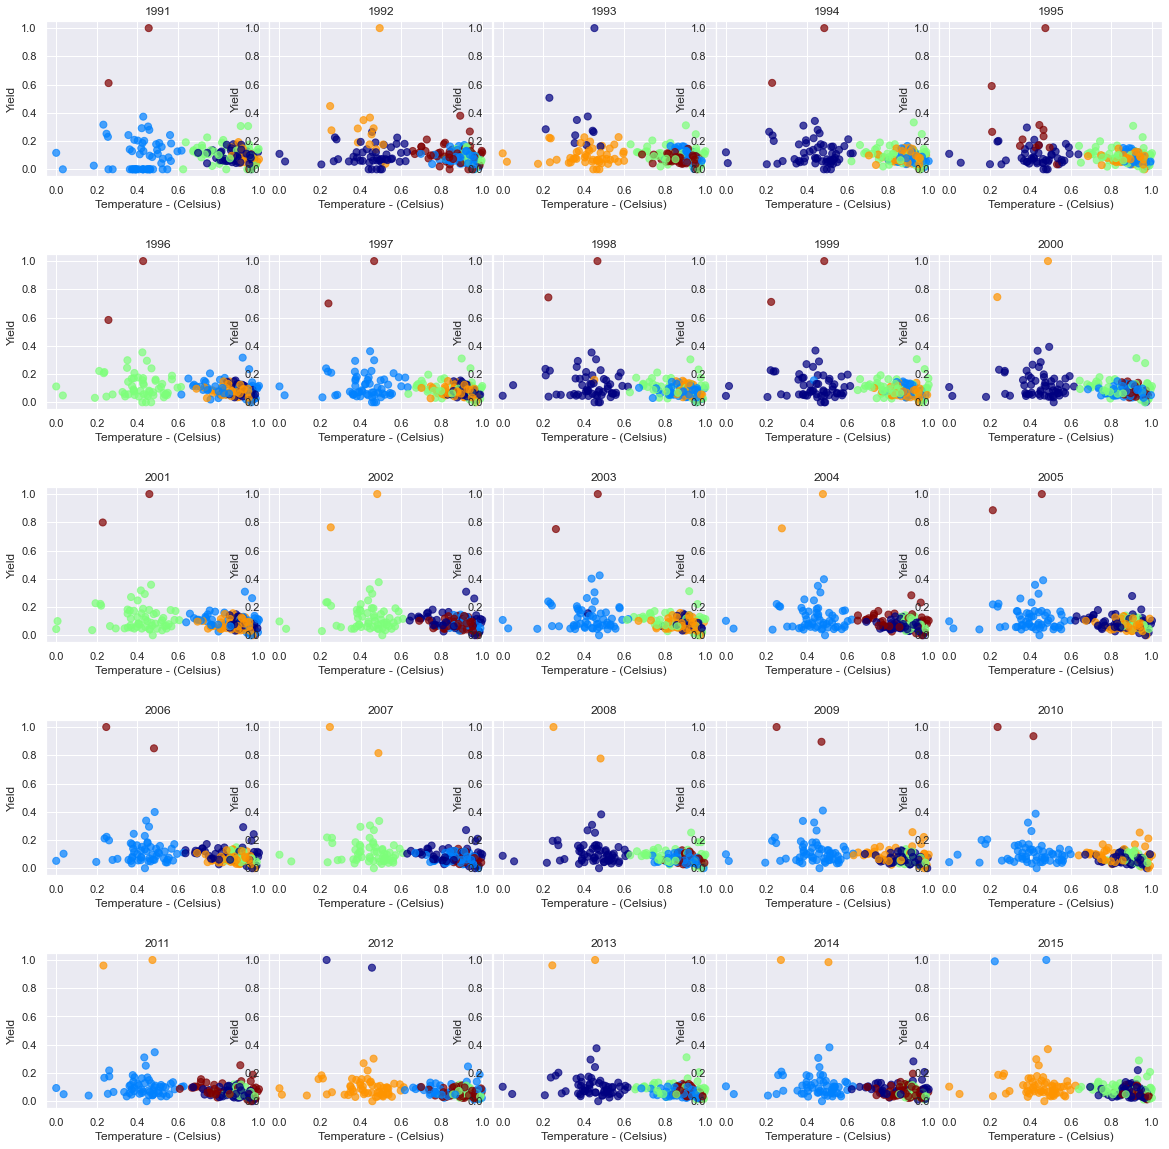

In [52]:
years = [str(year) for year in range(1991, 2016)]

fig, axes = plt.subplots(5,5, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

grid_combos = []
for i in range(5):
    for j in range(5):
        grid_combos.append((i, j))
        
for i, year in enumerate(years):
    yield2016 = rawMeltedYield[rawMeltedYield['Year'] == year]
    rainAndTem2016 = rainfallAndTemperatures[rainfallAndTemperatures['Year'] == year]
    yieldRainTemp = pd.merge(yield2016, rainAndTem2016, on=['Year', 'Area'], how='inner')
#     print(yieldRainTemp[yieldRainTemp['Area'] == 'World'])
    if(len(yieldRainTemp) != 0):
        yieldRainTemp = yieldRainTemp[['Yield', 'Rainfall - (MM)', 'Temperature - (Celsius)']]
           #bottom right 
        scaler = preprocessing.MinMaxScaler()
        yieldRainTemp[['Yield', 'Rainfall - (MM)', 'Temperature - (Celsius)']] = pd.DataFrame(scaler.fit_transform(yieldRainTemp))
        model = KMeans(5, verbose=0)
        model.fit(yieldRainTemp)

        kmeans_labels = pd.DataFrame(model.labels_)
        yieldRainTemp.loc[:, 'kmeans'] = kmeans_labels
        v1 = yieldRainTemp['Temperature - (Celsius)']
        v2 = yieldRainTemp['Yield']

        row, col = grid_combos[i]
        axes[row, col].scatter(v1, v2, c=kmeans_labels[0], s=50,cmap='jet',alpha=0.7)
        axes[row, col].set_xlabel(v1.name)
        axes[row, col].set_ylabel(v2.name)
        axes[row, col].set_title(year)
#         plt.colorbar(scatter)

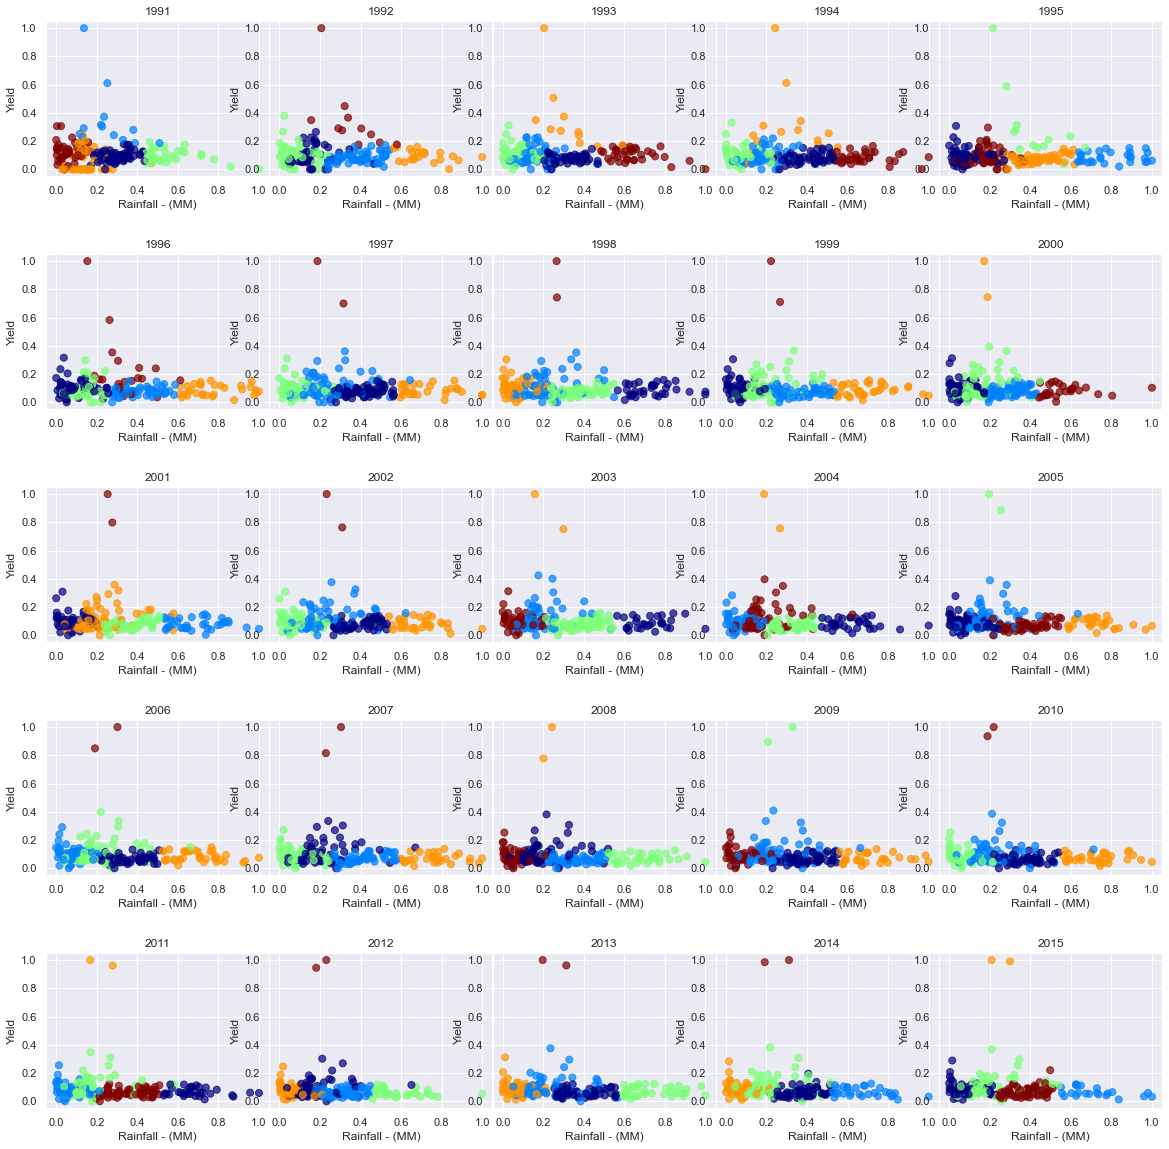

In [53]:
years = [str(year) for year in range(1991, 2016)]
fig, axes = plt.subplots(5,5, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

grid_combos = []
for i in range(5):
    for j in range(5):
        grid_combos.append((i, j))
        
for i, year in enumerate(years):
    yield2016 = rawMeltedYield[rawMeltedYield['Year'] == year]
    rainAndTem2016 = rainfallAndTemperatures[rainfallAndTemperatures['Year'] == year]
    yieldRainTemp = pd.merge(yield2016, rainAndTem2016, on=['Year', 'Area'], how='inner')
    if(len(yieldRainTemp) != 0):
        yieldRainTemp = yieldRainTemp[['Yield', 'Rainfall - (MM)', 'Temperature - (Celsius)']]
           #bottom right 
        scaler = preprocessing.MinMaxScaler()
        yieldRainTemp[['Yield', 'Rainfall - (MM)', 'Temperature - (Celsius)']] = pd.DataFrame(scaler.fit_transform(yieldRainTemp))
        model = KMeans(5, verbose=0)
        model.fit(yieldRainTemp)

        kmeans_labels = pd.DataFrame(model.labels_)
        yieldRainTemp.loc[:, 'kmeans'] = kmeans_labels
        v1 = yieldRainTemp['Rainfall - (MM)']
        v2 = yieldRainTemp['Yield']

        row, col = grid_combos[i]
        axes[row, col].scatter(v1, v2, c=kmeans_labels[0], s=50,cmap='jet',alpha=0.7)
        axes[row, col].set_xlabel(v1.name)
        axes[row, col].set_ylabel(v2.name)
        axes[row, col].set_title(year)

The factors that impact crop growth are mainly rainfall and temperature. We have this data, so is it possible to train a regression model for future predictions? Let's see.

## Worldwide Correlation (just as an experiment) - scrap it

In [54]:
productionRainfallTemp = pd.merge(rawMeltedProduction, rainfallAndTemperatures, on=["Year", "Area"], how='inner')
# productionRainfallTemp.drop(columns=['index'], inplace=True)

In [55]:
productionRainfallTemp

Year                                Area      Production  \
0     1991                         Afghanistan  10670914.00000   
1     1991                             Albania   2271847.00000   
2     1991                             Algeria  17586277.00000   
3     1991                              Angola   7254525.00000   
4     1991                 Antigua and Barbuda     24538.00000   
...    ...                                 ...             ...   
4935  2016  Venezuela (Bolivarian Republic of)  22933963.00000   
4936  2016                            Viet Nam 243227098.00000   
4937  2016                               Yemen   4681036.00000   
4938  2016                              Zambia  20218377.00000   
4939  2016                            Zimbabwe  10727164.00000   

      Rainfall - (MM)  Temperature - (Celsius)  
0           435.44990                 12.89449  
1           917.86880                 11.03765  
2            88.13276                 22.51346  
3          1017.98660                 21.71688  
4          2151.03100                 26.08025  
...               ...                      ...  
4935       1844.70330                 26.47820  
4936       1988.86180                 25.07316  
4937        171.48137                 24.22120  
4938        803.47810                 22.73705  
4939        455.13295                 22.31017  

[4940 rows x 5 columns]

In [56]:
# if('index' in productionRainfallTemp.columns):
#     productionRainfallTemp.drop(columns=['index'], inplace=True)
# if('level_0' in productionRainfallTemp.columns):
#     productionRainfallTemp.drop(columns=['level_0'], inplace=True)

[Text(0, 0.5, 'Production'),
 Text(0, 1.5, 'Rainfall - (MM)'),
 Text(0, 2.5, 'Temperature - (Celsius)')]

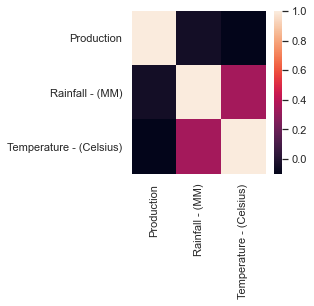

In [57]:
plt.figure(figsize=(3,3))
productionRainfallWorld = sns.heatmap(productionRainfallTemp.corr())
productionRainfallWorld.set_yticklabels(productionRainfallWorld.get_xticklabels(), rotation=0) 

In [58]:
productionRainfallTempYield = pd.merge(rawMeltedYield, rainfallAndTemperatures, on=["Year", "Area"], how='inner')

In [59]:
if('index' in productionRainfallTempYield.columns):
    productionRainfallTempYield.drop(columns=['index'], inplace=True)
if('level_0' in productionRainfallTempYield.columns):
    productionRainfallTempYield.drop(columns=['level_0'], inplace=True)

Yield  Rainfall - (MM)  Temperature - (Celsius)
Yield                    1.00000         -0.08574                 -0.27126
Rainfall - (MM)         -0.08574          1.00000                  0.35765
Temperature - (Celsius) -0.27126          0.35765                  1.00000

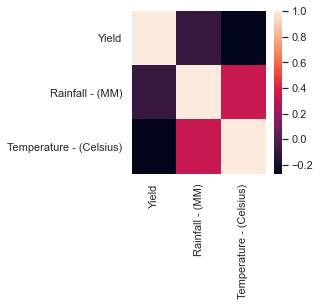

In [60]:
plt.figure(figsize=(3,3))
sns.heatmap(productionRainfallTempYield.corr())
productionRainfallTempYield.corr()

## Per Country Correlations

### Crops Overall

In [61]:
rawMeltedYield

Year            Area       Yield
0      1961     Afghanistan 40287.91667
1      1961          Africa 45553.50993
2      1961         Albania 15242.56944
3      1961         Algeria 31470.05556
4      1961  American Samoa 19846.12000
...     ...             ...         ...
14843  2018           World 93636.97674
14844  2018           Yemen 60869.95455
14845  2018    Yugoslav SFR     0.00000
14846  2018          Zambia 82033.07692
14847  2018        Zimbabwe 63697.85714

[14848 rows x 3 columns]

<AxesSubplot:xlabel='Country'>

<Figure size 2160x1440 with 0 Axes>

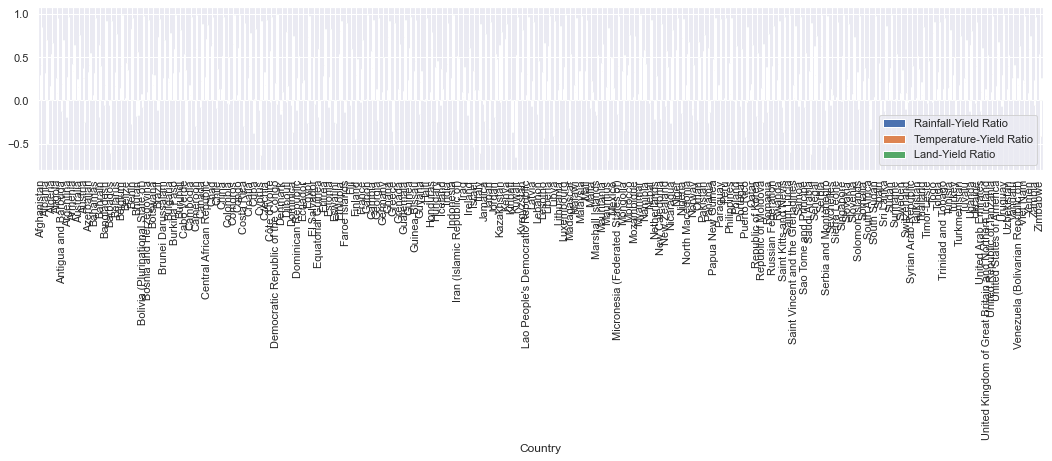

In [62]:
countriesOfInterest = rawMeltedYield['Area'].unique()
countriesMeetingThreshold = []

for country in countriesOfInterest:
    countryyield = rawMeltedProduction[rawMeltedProduction['Area'] == country]
    countryclimate = rainfallAndTemperatures[rainfallAndTemperatures['Area'] == country]
    countryharvested = areaHarvestedMelted[areaHarvestedMelted['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged = countrymerged.merge(countryharvested, on=['Year', 'Area'], how='inner')
    countrymerged.drop(columns=['index'], inplace=True, errors='ignore')
    corr = countrymerged.corr()
    countriesMeetingThreshold.append([country, corr.iloc[1,0], corr.iloc[2,0], corr.iloc[3,0]])    

countriesMeetingThreshold = pd.DataFrame(countriesMeetingThreshold, columns=['Country', 'Rainfall-Yield Ratio', 'Temperature-Yield Ratio', 'Land-Yield Ratio'])
countriesMeetingThreshold.dropna(inplace=True)
countriesMeetingThreshold.sort_values(by='Temperature-Yield Ratio', ascending=False)
countriesMeetingThreshold.set_index('Country', inplace=True)
plt.figure(figsize=(30,20))
countriesMeetingThreshold.plot.bar()

In [63]:
countriesMeetingThreshold.sort_values(by=['Rainfall-Yield Ratio', 'Temperature-Yield Ratio'], ascending=False)

Rainfall-Yield Ratio  Temperature-Yield Ratio  Land-Yield Ratio
Country                                                                     
Kazakhstan                0.64033                 -0.01688           0.79885
Senegal                   0.63108                  0.29820           0.75300
Chad                      0.62795                  0.66383           0.97013
Gambia                    0.57422                  0.37300           0.92996
Cabo Verde                0.54320                  0.35776          -0.47339
...                           ...                      ...               ...
Puerto Rico              -0.42423                 -0.02074           0.84714
Finland                  -0.44327                  0.29588           0.48619
Japan                    -0.51607                 -0.33572           0.90741
Israel                   -0.53593                  0.33984           0.12239
Kuwait                   -0.66051                  0.52953           0.96848

[188 rows x 3 columns]

### Only Caffeine-Based Crops

In [64]:
caffeineMelted = raw[np.logical_and(raw['Element'] == 'Production', raw['Item'].str.contains('Coffee|Tea|Kola'))].melt(id_vars=['Area'], value_vars=raw.columns[3:],
                              var_name='Year', value_name='Production')
caffeineMelted = caffeineMelted.groupby(['Year', 'Area'])['Production'].mean().reset_index()

<AxesSubplot:xlabel='Country'>

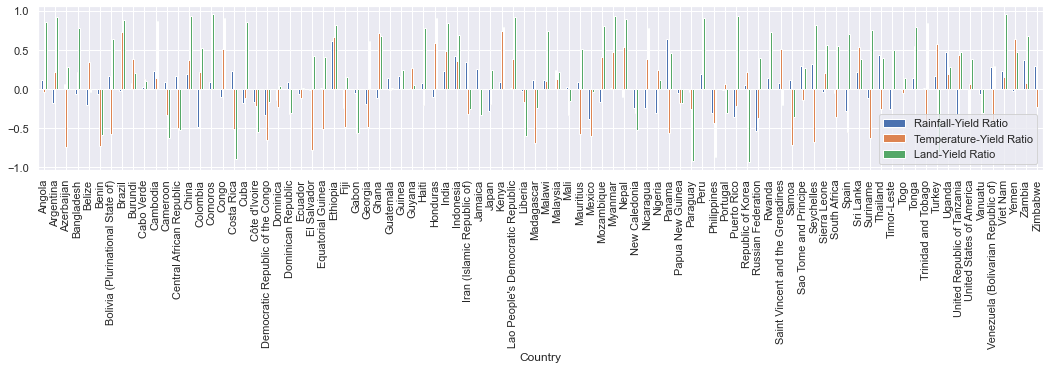

In [65]:
countriesOfInterest = caffeineMelted['Area'].unique()
countriesMeetingThreshold = []
tempCorr = pd.DataFrame()

for country in countriesOfInterest:
    countryyield = caffeineMelted[caffeineMelted['Area'] == country]
    countryclimate = rainfallAndTemperatures[rainfallAndTemperatures['Area'] == country]
    countryharvested = areaHarvestedMelted[areaHarvestedMelted['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged = countrymerged.merge(countryharvested, on=['Year', 'Area'], how='inner')

    countrymerged.drop(columns=['index'], inplace=True, errors='ignore')
    corr = countrymerged.corr()
    tempCorr = corr
    countriesMeetingThreshold.append([country, corr.iloc[1,0], corr.iloc[2,0], corr.iloc[3, 0]])    

countriesMeetingThreshold = pd.DataFrame(countriesMeetingThreshold, columns=['Country', 'Rainfall-Yield Ratio', 'Temperature-Yield Ratio', 'Land-Yield Ratio'])
countriesMeetingThreshold.dropna(inplace=True)
countriesMeetingThreshold.sort_values(by='Temperature-Yield Ratio', ascending=False)
countriesMeetingThreshold.set_index('Country', inplace=True)
countriesMeetingThreshold.plot.bar()

In [66]:
countriesMeetingThreshold.sort_values(by=['Rainfall-Yield Ratio', 'Temperature-Yield Ratio', 'Land-Yield Ratio'], ascending=False)

Rainfall-Yield Ratio  Temperature-Yield Ratio  \
Country                                                                   
Panama                                 0.63850                 -0.56605   
Ethiopia                               0.60962                  0.66471   
Uganda                                 0.46825                  0.18672   
Thailand                               0.43433                 -0.25099   
Indonesia                              0.42013                  0.35253   
...                                        ...                      ...   
Puerto Rico                           -0.35210                 -0.21944   
Mexico                                -0.37841                 -0.60408   
United States of America              -0.41738                  0.06258   
Colombia                              -0.47933                  0.22040   
Russian Federation                    -0.53313                 -0.37569   

                          Land-Yield Ratio  
Country                                     
Panama                             0.45652  
Ethiopia                           0.81977  
Uganda                             0.27858  
Thailand                           0.39571  
Indonesia                          0.69449  
...                                    ...  
Puerto Rico                        0.93136  
Mexico                            -0.04308  
United States of America           0.38615  
Colombia                           0.51723  
Russian Federation                 0.39774  

[90 rows x 3 columns]

# Future Predictions

## Overall Crop Yields

### Linear Regression for Overall

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [68]:
metric = 'Production'

In [69]:
countriesToTest = ['Kazakhstan', 'Republic of Korea', 'Namibia', 'Russia', 'Liberia', 'Somalia', 'Guinea-Bissau', 'India']

In [70]:
linearmodels = {}
linear_scalers = {}

for country in countriesToTest:
    #prep indiv. data
    countryyield = rawMeltedProduction[rawMeltedProduction['Area'] == country]
    countryclimate = rainfallAndTemperatures[rainfallAndTemperatures['Area'] == country]
    countryharvested = areaHarvestedMelted[areaHarvestedMelted['Area'] == country]
    #merge
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged = countrymerged.merge(countryharvested, on=['Year', 'Area'], how='inner') 
    countrymerged[metric] = countrymerged[metric].astype(int)
    if('index' in countrymerged.columns):
        countrymerged.drop(columns=['index'], inplace=True)
    if(len(countrymerged != 0)):
        countrymerged['Year'] = countrymerged['Year'].astype(int)
        y = countrymerged[metric].values
        X = countrymerged.drop(['Year', 'Area', metric], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train)

        reg_test = LinearRegression()
        reg_test.fit(X_train, y_train)

        X_test = min_max_scaler.transform(X_test)

        y_pred = reg_test.predict(X_test)
        print("R^2: {} for {}".format(reg_test.score(X_test, y_test), country))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error: {} for {}".format(rmse, country), end='\n\n')
        linearmodels[country] = reg_test
        linear_scalers[country] = min_max_scaler

R^2: 0.8698616047138001 for Kazakhstan
Root Mean Squared Error: 7369730.319999321 for Kazakhstan

R^2: -0.15353808048356532 for Republic of Korea
Root Mean Squared Error: 2752320.7817258267 for Republic of Korea

R^2: 0.6095101908161369 for Namibia
Root Mean Squared Error: 144103.59662678873 for Namibia

R^2: 0.891601572928114 for Liberia
Root Mean Squared Error: 183017.73075294675 for Liberia

R^2: 0.3829055721487691 for Somalia
Root Mean Squared Error: 142075.63510610478 for Somalia

R^2: 0.6014795694422059 for Guinea-Bissau
Root Mean Squared Error: 136925.2750042707 for Guinea-Bissau

R^2: -6.366086512520551 for India
Root Mean Squared Error: 734441239.05466 for India



### Polynomial Regression for Overall

In [71]:
polyregmodels = {}
polyfitters = {}
scalers = {}

for country in countriesToTest:
    countryyield = rawMeltedProduction[rawMeltedProduction['Area'] == country]
    countryclimate = rainfallAndTemperatures[rainfallAndTemperatures['Area'] == country]
    countryharvested = areaHarvestedMelted[areaHarvestedMelted['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged = countrymerged.merge(countryharvested, on=['Year', 'Area'], how='inner')
    if('index' in countrymerged.columns):
        countrymerged.drop(columns=['index'], inplace=True)
    if(len(countrymerged != 0)):
        countrymerged['Year'] = countrymerged['Year'].astype(int)
        y = countrymerged[metric].values
        X = countrymerged.drop(['Year', 'Area', metric], axis=1).values
        poly = PolynomialFeatures(degree=2)
        X_ = poly.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3, random_state=42)
        reg_test = LinearRegression()

        min_max_scaler = preprocessing.MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train)

        reg_test.fit(X_train, y_train)
        X_test = min_max_scaler.transform(X_test)

        y_pred = reg_test.predict(X_test)

        print("R^2: {} for {}".format(reg_test.score(X_test, y_test), country))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error: {} for {}".format(rmse, country))

        polyregmodels[country] = reg_test
        polyfitters[country] = poly
        scalers[country] = min_max_scaler

R^2: -21.783622572659706 for Kazakhstan
Root Mean Squared Error: 97512493.33797733 for Kazakhstan
R^2: 0.6076512490158422 for Republic of Korea
Root Mean Squared Error: 1605163.288754667 for Republic of Korea
R^2: -3.9273885929918118 for Namibia
Root Mean Squared Error: 511892.0385789767 for Namibia
R^2: 0.8489251754221445 for Liberia
Root Mean Squared Error: 216061.66840374927 for Liberia
R^2: 0.10222380883264504 for Somalia
Root Mean Squared Error: 171367.25318661306 for Somalia
R^2: -0.25148698017286053 for Guinea-Bissau
Root Mean Squared Error: 242645.08254921561 for Guinea-Bissau
R^2: 0.8174549849482357 for India
Root Mean Squared Error: 115617516.369751 for India


## Caffeine Crop Yields

### Linear Regression for Caffeine Crops

In [72]:
caffeineProdCountries = ['Angola', 'Argentina', 'Azerbaijan', 'Bangladesh', 'Belize',
       'Benin', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'China', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Cuba', 'Democratic Republic of the Congo',
       'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Ethiopia', 'Ethiopia PDR', 'Fiji',
       'French Polynesia', 'Gabon', 'Georgia', 'Ghana', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Jamaica', 'Japan',
       'Kenya', "Lao People's Democratic Republic", 'Liberia',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Martinique',
       'Mauritius', 'Mexico', 'Montenegro', 'Mozambique', 'Myanmar',
       'Nepal', 'New Caledonia', 'Nicaragua', 'Nigeria', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Portugal',
       'Puerto Rico', 'Republic of Korea', 'Réunion', 'Russia', 'Rwanda',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'Sao Tome and Principe', 'Saudi Arabia', 'Seychelles',
       'Sierra Leone', 'South Africa', 'Sri Lanka', 'Suriname',
       'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago',
       'Turkey', 'Uganda', 'United Republic of Tanzania', 'United States',
       'USSR', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe', 'World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Southern Africa',
       'Western Africa', 'Americas', 'Northern America',
       'Central America', 'Caribbean', 'South America']

In [73]:
cafflinearmodels = {}
cafflinear_scalers = {}

for country in caffeineProdCountries:
    #prep indiv. data
    countryyield = caffeineMelted[caffeineMelted['Area'] == country]
    countryclimate = rainfallAndTemperatures[rainfallAndTemperatures['Area'] == country]
    countryharvested = areaHarvestedMelted[areaHarvestedMelted['Area'] == country]
    #merge
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged = countrymerged.merge(countryharvested, on=['Year', 'Area'], how='inner')    
    if('index' in countrymerged.columns):
        countrymerged.drop(columns=['index'], inplace=True)
    if(len(countrymerged != 0)):
        countrymerged['Year'] = countrymerged['Year'].astype(int)
        y = countrymerged[metric].values
        X = countrymerged.drop(['Year', 'Area', metric], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train)

        reg_test = LinearRegression()
        reg_test.fit(X_train, y_train)

        X_test = min_max_scaler.transform(X_test)

        y_pred = reg_test.predict(X_test)
        print("R^2: {} for {}".format(reg_test.score(X_test, y_test), country))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error: {} for {}".format(rmse, country))
        cafflinearmodels[country] = reg_test
        cafflinear_scalers[country] = min_max_scaler

R^2: 0.5141247247527013 for Angola
Root Mean Squared Error: 3140.505113143233 for Angola
R^2: 0.7806578428393615 for Argentina
Root Mean Squared Error: 6105.239530350282 for Argentina
R^2: 0.5883448873991491 for Azerbaijan
Root Mean Squared Error: 4598.234100613623 for Azerbaijan
R^2: 0.25071272078934503 for Bangladesh
Root Mean Squared Error: 6228.684579708189 for Bangladesh
R^2: -0.20432964823498745 for Belize
Root Mean Squared Error: 96.11734731652692 for Belize
R^2: 0.32218813665656343 for Benin
Root Mean Squared Error: 16.68557985704199 for Benin
R^2: 0.54758928037866 for Bolivia (Plurinational State of)
Root Mean Squared Error: 1726.4890361673506 for Bolivia (Plurinational State of)
R^2: 0.42807816124036047 for Brazil
Root Mean Squared Error: 185175.3324404656 for Brazil
R^2: -0.15309367345519842 for Burundi
Root Mean Squared Error: 40892.196132722915 for Burundi
R^2: -0.25716942032635415 for Cabo Verde
Root Mean Squared Error: 19.108352715920738 for Cabo Verde
R^2: 0.53661720042

R^2: -0.13644506246963028 for Zambia
Root Mean Squared Error: 1009.1310314033507 for Zambia
R^2: -0.16890509420542577 for Zimbabwe
Root Mean Squared Error: 2654.738276597365 for Zimbabwe


In [74]:
caffpolyregmodels = {}
caffpolyfitters = {}
caffscalers = {}

for country in caffeineProdCountries:
    countryyield = caffeineMelted[caffeineMelted['Area'] == country]
    countryclimate = rainfallAndTemperatures[rainfallAndTemperatures['Area'] == country]
    countryharvested = areaHarvestedMelted[areaHarvestedMelted['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged = countrymerged.merge(countryharvested, on=['Year', 'Area'], how='inner')
    if('index' in countrymerged.columns):
        countrymerged.drop(columns=['index'], inplace=True)
    
    if(len(countrymerged != 0)):
        countrymerged['Year'] = countrymerged['Year'].astype(int)
        y = countrymerged[metric].values
        X = countrymerged.drop(['Year', 'Area', metric], axis=1).values
        poly = PolynomialFeatures(degree=2)
        X_ = poly.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3, random_state=42)
        reg_test = LinearRegression()

        min_max_scaler = preprocessing.MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train)

        reg_test.fit(X_train, y_train)
        X_test = min_max_scaler.transform(X_test)

        y_pred = reg_test.predict(X_test)

        print("R^2: {} for {}".format(reg_test.score(X_test, y_test), country))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error: {} for {}".format(rmse, country))

        polyregmodels[country] = reg_test
        polyfitters[country] = poly
        scalers[country] = min_max_scaler

R^2: 0.17386810833132482 for Angola
Root Mean Squared Error: 4095.0744226330394 for Angola
R^2: 0.5201113984790664 for Argentina
Root Mean Squared Error: 9030.501511628241 for Argentina
R^2: -1101.2573549822846 for Azerbaijan
Root Mean Squared Error: 237939.10506110912 for Azerbaijan
R^2: 0.06799793364338569 for Bangladesh
Root Mean Squared Error: 6946.732834830735 for Bangladesh
R^2: 0.24791892771485624 for Belize
Root Mean Squared Error: 75.95588301354029 for Belize
R^2: -1.1885246735072954 for Benin
Root Mean Squared Error: 29.982127354786144 for Benin
R^2: 0.8305748882699118 for Bolivia (Plurinational State of)
Root Mean Squared Error: 1056.5407977365965 for Bolivia (Plurinational State of)
R^2: 0.3424884969599843 for Brazil
Root Mean Squared Error: 198548.43599747203 for Brazil
R^2: -0.0707487764253345 for Burundi
Root Mean Squared Error: 39405.054623906006 for Burundi
R^2: -1.5254816411345575 for Cabo Verde
Root Mean Squared Error: 27.083104957648747 for Cabo Verde
R^2: 0.5444607

## Making Predictions

## 2018, 2019, 2020 predictions for Kazakhstan

91027543.51716453


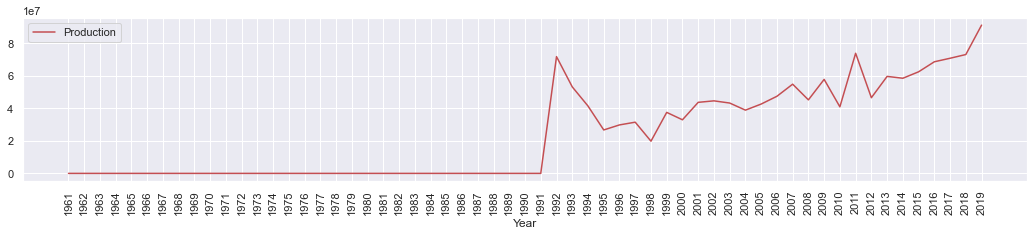

In [75]:
kazakh = linearmodels['Kazakhstan']
#Kazakhstan's total rainfall, average temperature and area harvested
X = [[320, 30, 11413941]]
pred2019 = kazakh.predict(linear_scalers['Kazakhstan'].transform(X))
print(pred2019[0])
rawMeltedProduction = rawMeltedProduction.append({'Year': 2019, 'Area': 'Kazakhstan', 'Production': pred2019[0]}, ignore_index=True)
kazakh = rawMeltedProduction[rawMeltedProduction['Area'] == 'Kazakhstan']
kazakh = kazakh.set_index('Year')
kazakh.plot(color='r')
plt.xticks(range(len(kazakh.index)), kazakh.index, rotation=90)
plt.show()

2663076.9708257522


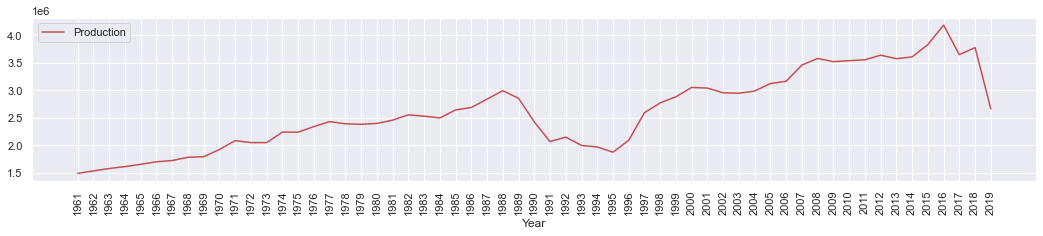

In [76]:
korea = linearmodels['Liberia']
#Kazakhstan's total rainfall, average temperature and area harvested
X = [[3000.79150, 30.17398, 1279954]]
pred2019 = korea.predict(linear_scalers['Liberia'].transform(X))
print(pred2019[0])
rawMeltedProduction = rawMeltedProduction.append({'Year': 2019, 'Area': 'Liberia', 'Production': pred2019[0]}, ignore_index=True)
koreaY = rawMeltedProduction[rawMeltedProduction['Area'] == 'Liberia']
koreaY = koreaY.set_index('Year')
koreaY.plot(color='r')
plt.xticks(range(len(koreaY.index)), koreaY.index, rotation=90)
plt.show()